In [5]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import NearMiss
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.metrics import plot_confusion_matrix
#from pretty_confusion_matrix import pp_matrix
#from pretty_confusion_matrix import pp_matrix_from_data
#from sklearn.metrics.ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn import model_selection
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
#from sklearn import svm
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import SelectKBest

#for classification, we use these three
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

sns.set(rc={'figure.figsize':(8,8)})

In [ ]:
#pip install imblearn

In [ ]:
#pip install xgboost

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#conda update -c conda-forge scikit-learn

In [6]:
df_train=pd.read_csv("C:/Users/acer/Desktop/DM_project/train.csv")
df_test = pd.read_csv("C:/Users/acer/Desktop/DM_project/test.csv")
df_target = pd.read_csv("C:/Users/acer/Desktop/DM_project/submission.csv")

df_train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,16164945,13601,6848,13175.28583,59,BAT3193689,9.408858,C,A4,MORTGAGE,...,564.614852,0.865230,0,INDIVIDUAL,69,0,48,181775,34301,1
67459,35182714,8323,11046,15637.46301,59,BAT1780517,9.972104,C,B3,RENT,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
67460,16435904,15897,32921,12329.45775,59,BAT1761981,19.650943,A,F3,MORTGAGE,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
67461,5300325,16567,4975,21353.68465,59,BAT2333412,13.169095,D,E3,OWN,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [7]:
df_test["Loan Status"]=df_target["Loan Status"]
#df_test.drop('Loan Status', axis = 1, inplace = True)
#df_test

In [8]:
frames = [df_train, df_test]
df_train = pd.concat(frames)
df_train

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28908,11537800,35000,35000,35000.00000,60,BAT5629144,16.240000,C,C5,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,109,0,0,883984,114000,0
28909,11538258,25000,25000,25000.00000,60,BAT5629144,14.980000,C,C3,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,104,0,0,513925,51800,0
28910,13147685,30000,30000,29950.00000,60,BAT2136391,18.240000,D,D5,MORTGAGE,...,0.000000,0.000000,1,INDIVIDUAL,83,0,0,296294,65600,0
28911,13917689,25000,25000,24950.00000,60,BAT2136391,15.610000,D,D1,MORTGAGE,...,0.000000,0.000000,0,INDIVIDUAL,83,0,0,428723,30400,0


In [9]:
train, test = train_test_split(df_train, test_size=0.2, random_state=42)

In [6]:
df_train["Loan Status"].value_counts()

0    90135
1     6241
Name: Loan Status, dtype: int64

In [7]:
#With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
y=df_train["Loan Status"].value_counts(normalize = True).round(2) * 100 
y

0    94.0
1     6.0
Name: Loan Status, dtype: float64

<BarContainer object of 2 artists>

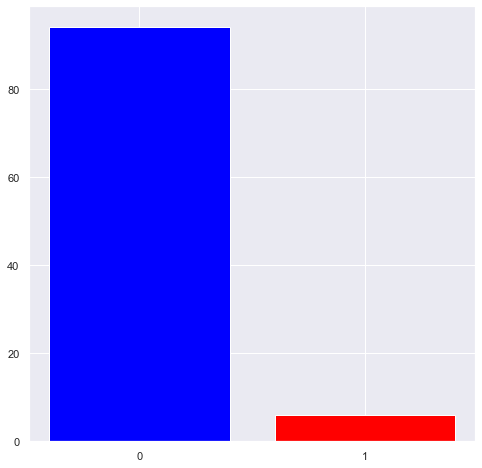

In [8]:
#it needs balancing data
x=["0","1"]
plt.bar(x,height=y,color=['blue', 'red'])

In [9]:
train["Loan Status"].value_counts()

0    72112
1     4988
Name: Loan Status, dtype: int64

In [10]:
#With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
f=train["Loan Status"].value_counts(normalize = True).round(2) * 100 
f

0    94.0
1     6.0
Name: Loan Status, dtype: float64

In [11]:
test["Loan Status"].value_counts()

0    18023
1     1253
Name: Loan Status, dtype: int64

In [12]:
#With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
C=test["Loan Status"].value_counts(normalize = True).round(2) * 100 
C

0    93.0
1     7.0
Name: Loan Status, dtype: float64

 Up-sample Minority Class

In [13]:
df_majority = train[train["Loan Status"]==0]
df_minority = train[train["Loan Status"]==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=15000,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled["Loan Status"].value_counts()
train=df_upsampled

near miss میتواند به جای آپ سمپل استفاده شود اما نتیجه بهتری دریافت نمیشود و همچنان کمتر از بیس لاین خروجی خواهد داد.

In [14]:
#Near miss
#undersampler = NearMiss(version = 1, n_neighbors = 3)
#X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

#lr_re = LogisticRegression(max_iter=125)
#lr_re.fit(X_resampled, y_resampled)
#y_pred_lr_re = lr_re.predict(X_test)
#acc_lr_re = round(lr_re.score(X_resampled, y_resampled) * 100, 2)
#acc_lr_re


#print(classification_report(y_test, y_pred_lr_re))

In [15]:
f=train["Loan Status"].value_counts(normalize = True).round(2) * 100 
f

0    83.0
1    17.0
Name: Loan Status, dtype: float64

In [16]:
df_train.isnull().sum()

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay 

In [17]:
train.var().sort_values()

Accounts Delinquent             2.869078e-04
Collection 12 months Medical    2.029135e-02
Public Record                   1.287852e-01
Loan Status                     1.425436e-01
Inquires - six months           2.853194e-01
Delinquency - two years         6.733745e-01
Interest Rate                   1.424459e+01
Total Received Late Fee         2.669071e+01
Term                            3.273416e+01
Open Account                    3.831334e+01
Collection Recovery Fee         6.420086e+01
Debit to Income                 7.231920e+01
Total Accounts                  7.649273e+01
Revolving Utilities             5.114624e+02
Last week Pay                   1.860386e+03
Recoveries                      1.257462e+05
Total Collection Amount         6.085912e+05
Total Received Interest         4.852612e+06
Funded Amount Investor          4.779342e+07
Funded Amount                   6.644416e+07
Loan Amount                     7.011191e+07
Revolving Balance               7.867519e+07
Total Revo

In [18]:
df_train_sel1 = train.loc[ : , train.nunique() == 67463]
df_train_sel1

""
29302
9344
15331
34892
23950
...
54681
40377
40700
40604


In [19]:
train["Payment Plan"].value_counts()

n    87112
Name: Payment Plan, dtype: int64

droping these two columns because they had unique value for each record

In [20]:
train.drop(columns = ['ID', 'Payment Plan'], axis = 1, inplace = True)
test.drop(columns = ['ID', 'Payment Plan'], axis = 1, inplace = True)

#  Outliers & Anomalies

Percentile Method
IQR Method
Box - Plot Method

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open Account'>

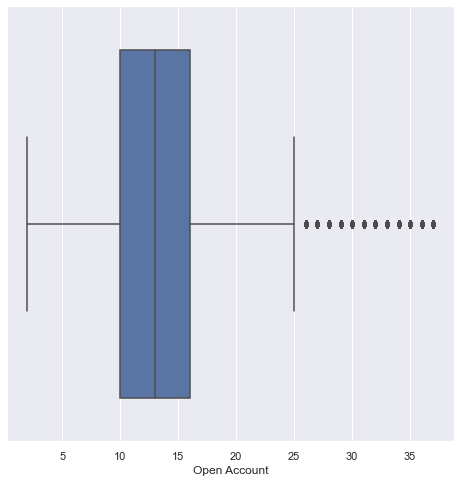

In [21]:
sns.boxplot(train['Open Account'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan Amount'>

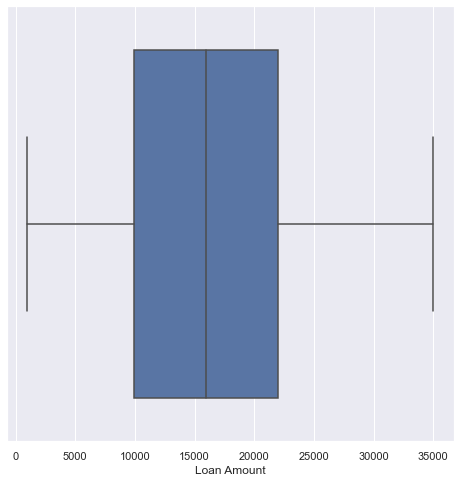

In [22]:
sns.boxplot(train['Loan Amount'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funded Amount'>

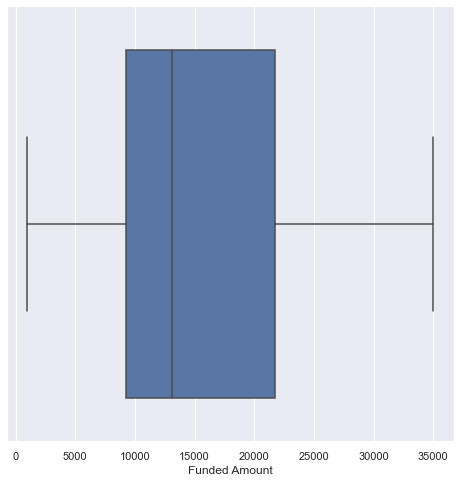

In [23]:
sns.boxplot(train['Funded Amount'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funded Amount Investor'>

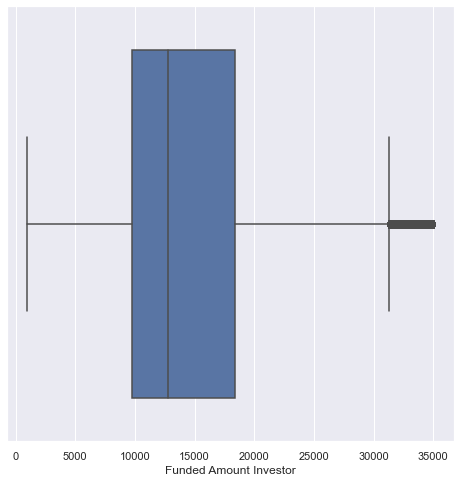

In [24]:
sns.boxplot(train['Funded Amount Investor'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Interest Rate'>

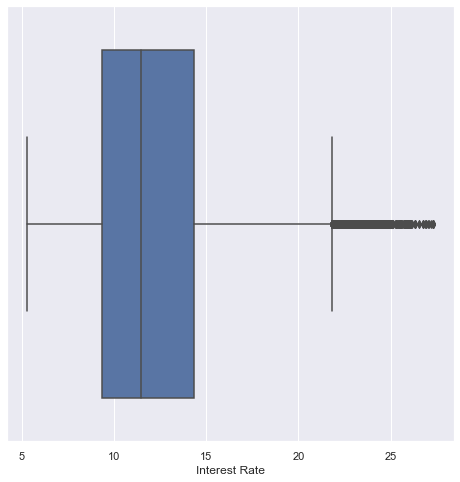

In [25]:
sns.boxplot(train['Interest Rate'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Public Record'>

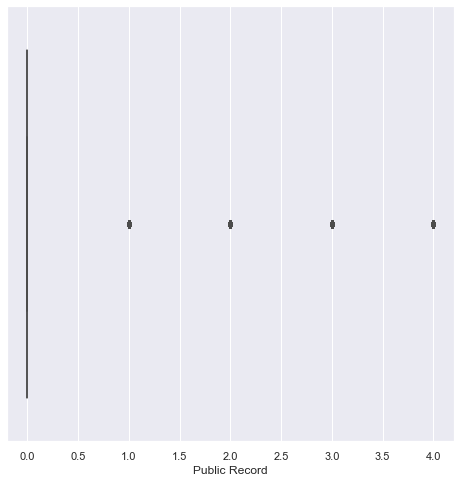

In [26]:
sns.boxplot(train['Public Record'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

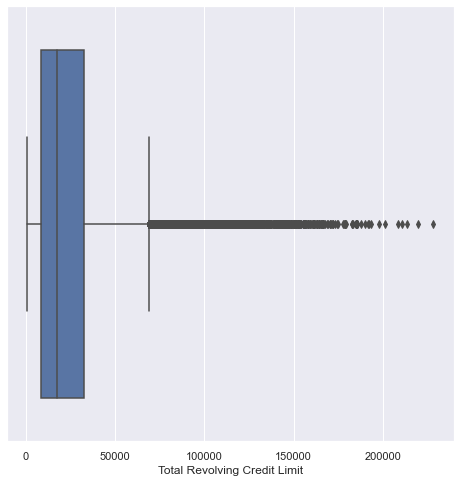

In [27]:
sns.boxplot(train['Total Revolving Credit Limit'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Current Balance'>

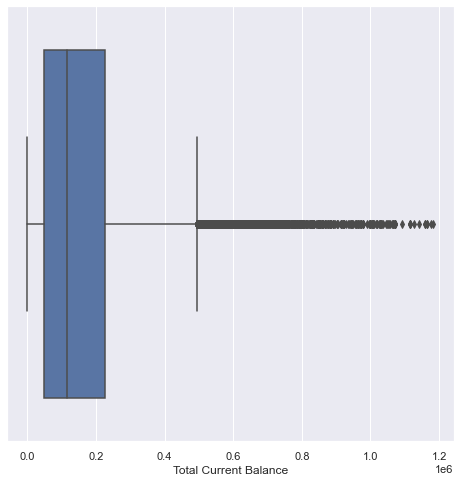

In [28]:
sns.boxplot(train['Total Current Balance'])

Z_score

In [29]:
#cols_list=New_X.columns.values.tolist()
cols_list=["Open Account","Loan Amount","Funded Amount","Funded Amount Investor","Total Revolving Credit Limit","Total Current Balance"]
#cols_list=train.columns
#print(cols_list)

z = np.abs(stats.zscore(train[cols_list]))
data_clean = train[((z<3)&(z>-3)).all(axis=1)]
data_clean.shape

(82819, 33)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Open Account'>

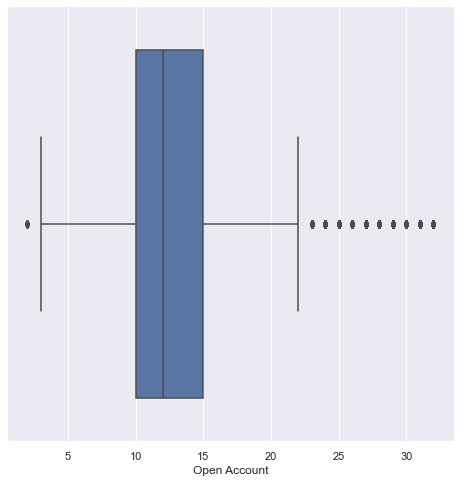

In [30]:
sns.boxplot(data_clean['Open Account'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funded Amount Investor'>

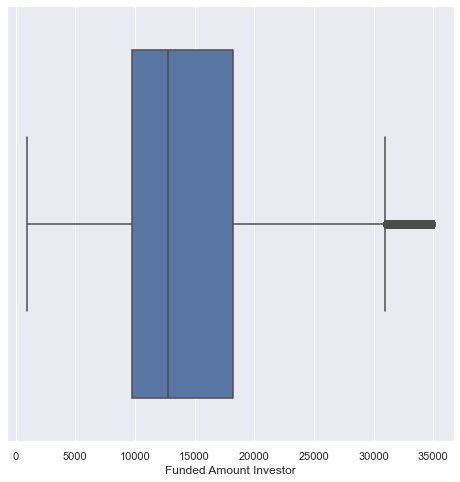

In [31]:
sns.boxplot(data_clean['Funded Amount Investor'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Funded Amount'>

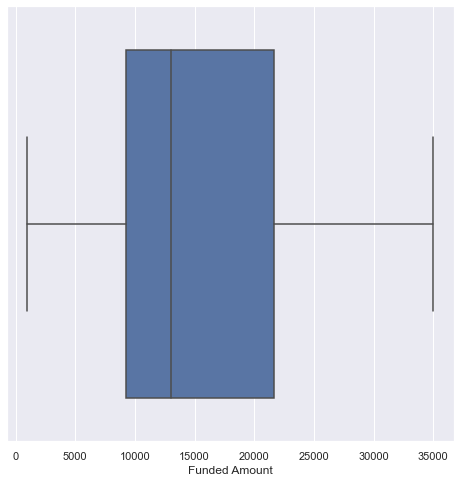

In [32]:
sns.boxplot(data_clean['Funded Amount'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

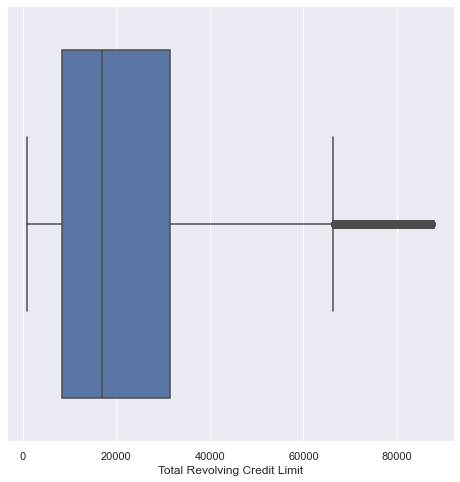

In [33]:
sns.boxplot(data_clean['Total Revolving Credit Limit'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Current Balance'>

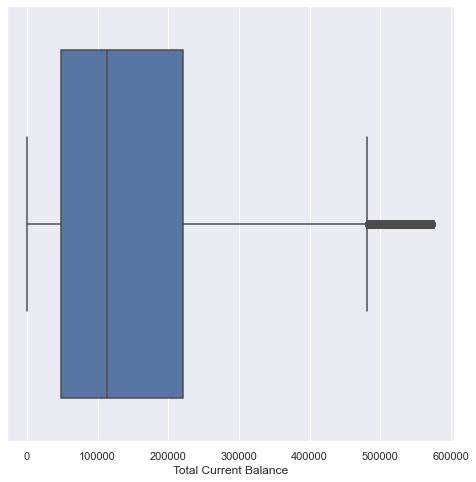

In [34]:
sns.boxplot(data_clean['Total Current Balance'])

# IQR

In [35]:
cols_list=["Open Account","Loan Amount","Funded Amount","Funded Amount Investor","Total Revolving Credit Limit","Total Current Balance"]
Q1 = train[cols_list].quantile(0.25)
Q3 = train[cols_list].quantile(0.75)
IQR = Q3 - Q1
IQR

Open Account                         6.000000
Loan Amount                      12084.000000
Funded Amount                    12475.250000
Funded Amount Investor            8591.915198
Total Revolving Credit Limit     24144.000000
Total Current Balance           178487.000000
dtype: float64

In [36]:
band=[Q1 - 1.5 * IQR,Q3 + 1.5 * IQR]
band


[Open Account                         1.00000
 Loan Amount                      -8194.00000
 Funded Amount                    -9460.12500
 Funded Amount Investor           -3095.26903
 Total Revolving Credit Limit    -27736.25000
 Total Current Balance          -218993.50000
 dtype: float64,
 Open Account                        25.000000
 Loan Amount                      40142.000000
 Funded Amount                    40440.875000
 Funded Amount Investor           31272.391762
 Total Revolving Credit Limit     68839.750000
 Total Current Balance           494954.500000
 dtype: float64]

In [37]:
delout= train[((train[cols_list] < (Q1 - 1.5 * IQR)) |(train[cols_list] > (Q3 + 1.5 * IQR))).any(axis=1)]
delout

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
19560,11875,16741,34112.407670,60,BAT1780517,11.415346,E,E3,RENT,72849.69701,...,4.248980,0.735442,0,INDIVIDUAL,12,0,447,162594,5172,0
26671,33800,33800,33800.000000,60,BAT3193689,24.500000,F,F3,RENT,110000.00000,...,0.000000,0.000000,0,INDIVIDUAL,74,0,272,155664,4600,0
23690,28466,26262,19261.269290,58,BAT5924421,8.743201,C,B2,RENT,56078.87058,...,5.299103,0.663567,0,INDIVIDUAL,65,0,40,90688,14669,0
25141,18182,21586,14435.981630,59,BAT5547201,15.872417,B,B4,RENT,70314.51587,...,1.299322,0.481872,0,INDIVIDUAL,91,0,34,170473,73357,0
62192,19747,7028,13998.085240,58,BAT5924421,7.595484,A,B3,MORTGAGE,80940.06674,...,4.570640,0.608274,0,INDIVIDUAL,11,0,56,27560,1974,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11102,13992,22612,8477.094044,36,BAT4136152,21.456448,B,D1,MORTGAGE,46360.37702,...,3.354675,0.544295,0,INDIVIDUAL,63,0,18,49642,7069,1
6540,15571,5113,16892.665610,59,BAT5811547,10.996983,A,B4,MORTGAGE,80386.87637,...,2.466224,1.035831,0,INDIVIDUAL,94,0,33,670562,65165,1
47579,17472,8093,3361.614368,58,BAT1930365,13.279064,E,B3,RENT,56369.87271,...,4.390745,0.158874,0,INDIVIDUAL,75,0,32,208677,6658,1
38059,15042,10053,12479.343970,59,BAT1766061,17.645645,D,E2,RENT,177965.00720,...,1.694855,0.648363,0,INDIVIDUAL,94,0,49,72287,85768,1


C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Current Balance'>

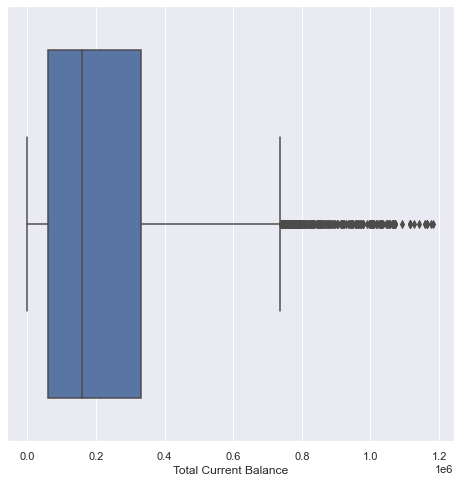

In [38]:
sns.boxplot(delout['Total Current Balance'])

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Revolving Credit Limit'>

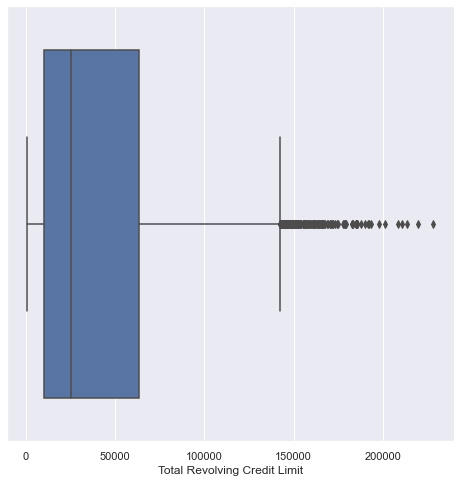

In [39]:
sns.boxplot(delout['Total Revolving Credit Limit'])

delout.shape < test.shape ---> delout is not okey for model trainning and data_clean seems better

In [40]:
print(delout.shape)
print(test.shape)
print(data_clean.shape)

(15051, 33)
(19276, 33)
(82819, 33)


In [41]:
train=data_clean
train.shape

(82819, 33)

# reclassify categorical feature

In [42]:
for x in range(train.shape[0]):
    if  (train.iloc[x,7] == 'A1') | (train.iloc[x,7] == 'A2') | (train.iloc[x,7] == 'A3') | (train.iloc[x,7] == 'A4') | (train.iloc[x,7] == 'A5'):
        train.iloc[x,7] = 'A'
    if  (train.iloc[x,7] == 'B1') | (train.iloc[x,7] == 'B2') | (train.iloc[x,7] == 'B3') | (train.iloc[x,7] == 'B4') | (train.iloc[x,7] == 'B5'):
        train.iloc[x,7] = 'B'
    if  (train.iloc[x,7] == 'C1') | (train.iloc[x,7] == 'C2') | (train.iloc[x,7] == 'C3') | (train.iloc[x,7] == 'C4') | (train.iloc[x,7] == 'C5'):
        train.iloc[x,7] = 'C'
    if  (train.iloc[x,7] == 'D1') | (train.iloc[x,7] == 'D2') | (train.iloc[x,7] == 'D3') | (train.iloc[x,7] == 'D4') | (train.iloc[x,7] == 'D5'):
        train.iloc[x,7] = 'D'
    if  (train.iloc[x,7] == 'E1') | (train.iloc[x,7] == 'E2') | (train.iloc[x,7] == 'E3') | (train.iloc[x,7] == 'E4') | (train.iloc[x,7] == 'E5'):
        train.iloc[x,7] = 'E'
    if  (train.iloc[x,7] == 'F1') | (train.iloc[x,7] == 'F2') | (train.iloc[x,7] == 'F3') | (train.iloc[x,7] == 'F4') | (train.iloc[x,7] == 'F5'):
        train.iloc[x,7] = 'F'
    if  (train.iloc[x,7] == 'G1') | (train.iloc[x,7] == 'G2') | (train.iloc[x,7] == 'G3') | (train.iloc[x,7] == 'G4') | (train.iloc[x,7] == 'G5'):
        train.iloc[x,7] = 'G'

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
for x in range(test.shape[0]):
    if  (test.iloc[x,7] == 'A1') | (test.iloc[x,7] == 'A2') | (test.iloc[x,7] == 'A3') | (test.iloc[x,7] == 'A4') | (test.iloc[x,7] == 'A5'):
        test.iloc[x,7] = 'A'
    if  (test.iloc[x,7] == 'B1') | (test.iloc[x,7] == 'B2') | (test.iloc[x,7] == 'B3') | (test.iloc[x,7] == 'B4') | (test.iloc[x,7] == 'B5'):
        test.iloc[x,7] = 'B'
    if  (test.iloc[x,7] == 'C1') | (test.iloc[x,7] == 'C2') | (test.iloc[x,7] == 'C3') | (test.iloc[x,7] == 'C4') | (test.iloc[x,7] == 'C5'):
        test.iloc[x,7] = 'C'
    if  (test.iloc[x,7] == 'D1') | (test.iloc[x,7] == 'D2') | (test.iloc[x,7] == 'D3') | (test.iloc[x,7] == 'D4') | (test.iloc[x,7] == 'D5'):
        test.iloc[x,7] = 'D'
    if  (test.iloc[x,7] == 'E1') | (test.iloc[x,7] == 'E2') | (test.iloc[x,7] == 'E3') | (test.iloc[x,7] == 'E4') | (test.iloc[x,7] == 'E5'):
        test.iloc[x,7] = 'E'
    if  (test.iloc[x,7] == 'F1') | (test.iloc[x,7] == 'F2') | (test.iloc[x,7] == 'F3') | (test.iloc[x,7] == 'F4') | (test.iloc[x,7] == 'F5'):
        test.iloc[x,7] = 'F'
    if  (test.iloc[x,7] == 'G1') | (test.iloc[x,7] == 'G2') | (test.iloc[x,7] == 'G3') | (test.iloc[x,7] == 'G4') | (test.iloc[x,7] == 'G5'):
        test.iloc[x,7] = 'G'

# Encoding test and train categorical values

should invert categorical features to numeric because machine can't understand text.just can understand numbers.

I . List of Categorical features

Batch Enrolled ---> 41
Grade ---> 7
Sub Grade ---> 35
Employment Duration ---> 3
Verification Status ---> 3
Payment Plan ---> 1
Loan Title ---> 109
Initial List Status ---> 2
Application Type ---> 2

II. Category of Categorical features

    Nominal

    Employment Duration Verification Status Loan Title

    Ordinal

    Grade Sub Grade

    Binary

    Initial List Status Application Type

Note

Feature 'Payment Plan' already dropped.
Feature 'Batch Enrolled' will be dealt with the help of string manipulation later.

In [44]:
 # Mixed type features

train.loc[:,"Batch Enrolled"] = train.loc[:,"Batch Enrolled"].str.replace("BAT", "").astype('int64')
test.loc[:,"Batch Enrolled"] = test.loc[:,"Batch Enrolled"].str.replace("BAT", "").astype('int64')


# Note
# 1. Extract text part and converted into integer dtype.
#چون از جنس ابجکت بوده رشته بت ابتدای هر کدام از رکوردها را برداشته و عدد باقی مانده را تبدیل را تبدیل به اینتیجر کره است

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [45]:
df_combined = [train]
df_combined_test = [test]

In [46]:
# 1. Encoding Ordinal Categorical variables - Grade

grade = {"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7 }

for dataset in df_combined:
    dataset['Grade'] = dataset['Grade'].map(grade)
    
for dataset in df_combined_test:
    dataset['Grade'] = dataset['Grade'].map(grade)

<ipython-input-46-23964693a76d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Grade'] = dataset['Grade'].map(grade)


In [47]:
# 2. Encoding Ordinal Categorical variables - Sub Grade

#subgrade = {"A1":1, "A2":2, "A3":3, "A4":4, "A5":5,
 #          "B1":6, "B2":7, "B3":8, "B4":9, "B5":10,
  #         "C1":11, "C2":12, "C3":13, "C4":14, "C5":15,
   #        "D1":16, "D2":17, "D3":18, "D4":19, "D5":20,
    #       "E1":21, "E2":22, "E3":23, "E4":24, "E5":25,
     #      "F1":26, "F2":27, "F3":28, "F4":29, "F5":30,
      #     "G1":31, "G2":32, "G3":33, "G4":34, "G5":35}
subgrade={"A":1, "B":2, "C":3, "D":4, "E":5, "F":6, "G":7 }

for dataset in df_combined:
    dataset['Sub Grade'] = dataset['Sub Grade'].map(subgrade)
    
for dataset in df_combined_test:
    dataset['Sub Grade'] = dataset['Sub Grade'].map(subgrade)

<ipython-input-47-e5c100e2d8f0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Sub Grade'] = dataset['Sub Grade'].map(subgrade)


In [48]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train["Initial List Status"])
print(integer_encoded)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

train["Initial List Status"]=integer_encoded

[0 0 1 ... 0 1 1]


<ipython-input-48-cba4261c89ef>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Initial List Status"]=integer_encoded


In [49]:
label_encoder4 = LabelEncoder()
integer_encoded4 = label_encoder4.fit_transform(test["Initial List Status"])
print(integer_encoded4)
integer_encoded4 = integer_encoded4.reshape(len(integer_encoded4), 1)

test["Initial List Status"]=integer_encoded4

[1 0 1 ... 0 1 1]


In [50]:
label_encoder3 = LabelEncoder()
integer_encoded3 = label_encoder3.fit_transform(train["Application Type"])
print(integer_encoded3)
integer_encoded3 = integer_encoded3.reshape(len(integer_encoded3), 1)

train["Application Type"]=integer_encoded3

[0 0 0 ... 0 0 0]


<ipython-input-50-0031b50d2212>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Application Type"]=integer_encoded3


In [51]:
label_encoder6 = LabelEncoder()
integer_encoded6 = label_encoder6.fit_transform(test["Application Type"])
print(integer_encoded6)
integer_encoded6 = integer_encoded6.reshape(len(integer_encoded6), 1)

test["Application Type"]=integer_encoded6

[0 0 0 ... 0 0 0]


In [52]:
label_encoder1 = LabelEncoder()
integer_encoded1 = label_encoder1.fit_transform(train["Employment Duration"])
print(integer_encoded1)
integer_encoded1 = integer_encoded1.reshape(len(integer_encoded1), 1)

train["Employment Duration"]=integer_encoded1

[2 0 1 ... 2 2 0]


<ipython-input-52-bc703e897e11>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Employment Duration"]=integer_encoded1


In [53]:
label_encoder7 = LabelEncoder()
integer_encoded7 = label_encoder7.fit_transform(test["Employment Duration"])
print(integer_encoded7)
integer_encoded7 = integer_encoded7.reshape(len(integer_encoded7), 1)

test["Employment Duration"]=integer_encoded7

[0 2 2 ... 0 1 0]


In [54]:
label_encoder2 = LabelEncoder()
integer_encoded2 = label_encoder2.fit_transform(train["Verification Status"])
print(integer_encoded2)
integer_encoded2 = integer_encoded2.reshape(len(integer_encoded2), 1)

train["Verification Status"]=integer_encoded2

[1 0 0 ... 0 1 2]


<ipython-input-54-7412c66cf950>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Verification Status"]=integer_encoded2


In [55]:
label_encoder8 = LabelEncoder()
integer_encoded8 = label_encoder8.fit_transform(test["Verification Status"])
print(integer_encoded8)
integer_encoded8 = integer_encoded8.reshape(len(integer_encoded8), 1)

test["Verification Status"]=integer_encoded8

[0 2 1 ... 1 2 1]


In [56]:
label_encoder5 = LabelEncoder()
integer_encoded5 = label_encoder5.fit_transform(train["Loan Title"])
print(integer_encoded5)
integer_encoded5 = integer_encoded5.reshape(len(integer_encoded5), 1)

train["Loan Title"]=integer_encoded5

[38 49 38 ... 38 49 38]


<ipython-input-56-b3a8c4a8f1b2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Loan Title"]=integer_encoded5


In [57]:
label_encoder10 = LabelEncoder()
integer_encoded10 = label_encoder10.fit_transform(test["Loan Title"])
print(integer_encoded10)
integer_encoded10 = integer_encoded10.reshape(len(integer_encoded10), 1)

test["Loan Title"]=integer_encoded10

[37 37 37 ... 37 37 37]


# standardization

Z_score

In [58]:
df_zscore = pd.DataFrame()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = train.select_dtypes(include=numerics)
newdf.drop(columns=['Loan Status'])

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
29302,5516,22655,13895.497900,59,3193689,17.880861,4,7,2,72276.26115,...,0.054257,3.863105,0.867726,0,0,6,0,27,191047,37314
9344,10463,8426,6184.779338,59,5629144,11.585963,5,2,0,50482.99488,...,0.045734,1.591607,1.236331,0,0,135,0,25,215753,7533
15331,18940,23029,16289.935260,59,3726927,11.194286,1,5,1,252511.26220,...,0.055764,4.577893,1.117297,0,0,61,0,61,197610,4183
34892,18222,26686,20292.640760,59,1780517,13.191748,3,5,0,114516.24010,...,0.096257,1.281600,0.342047,0,0,46,0,43,123799,8336
23950,15000,15000,15000.000000,36,3873588,7.890000,1,1,2,50000.00000,...,0.000000,0.000000,0.000000,1,0,26,0,0,21336,11200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54681,15766,21720,18765.269100,59,4136152,9.347758,3,4,0,113405.61240,...,0.035628,9.280892,1.167474,0,0,23,0,13,147393,18634
40377,21244,5497,16143.597700,59,2252229,11.069538,3,3,0,29781.36037,...,0.028713,6.632533,0.832274,0,0,61,0,9,27719,2767
40700,8230,20358,9562.190047,59,2522922,12.013758,3,2,2,63007.96100,...,0.054487,0.703663,0.714302,0,0,121,0,60,141791,27743
40604,5093,33566,9454.037328,58,2078974,11.966004,2,4,2,65116.80916,...,0.031518,3.074554,1.203812,0,0,67,0,40,11971,14413


In [59]:
newdf.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Batch Enrolled', 'Interest Rate', 'Grade', 'Sub Grade',
       'Employment Duration', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Debit to Income', 'Delinquency - two years',
       'Inquires - six months', 'Open Account', 'Public Record',
       'Revolving Balance', 'Revolving Utilities', 'Total Accounts',
       'Initial List Status', 'Total Received Interest',
       'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee',
       'Collection 12 months Medical', 'Application Type', 'Last week Pay',
       'Accounts Delinquent', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [60]:
df_zscore = pd.DataFrame(zscore(newdf),columns=newdf.columns)
df_zscore

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,-1.337032,0.855684,-0.107291,0.318116,0.010019,1.571071,0.852510,2.699236,1.257683,-0.175825,...,-0.152377,-0.041562,-0.145112,-0.039497,-1.477830,-0.016667,-0.155992,0.331688,0.864383,-0.455544
1,-0.745583,-0.893010,-1.225412,0.318116,1.608698,-0.095726,1.577702,-0.663754,-0.889394,-0.665464,...,-0.158786,0.004078,-0.145112,-0.039497,1.514486,-0.016667,-0.158566,0.531824,-0.823172,-0.455544
2,0.267903,0.901648,0.239923,0.318116,0.360047,-0.199436,-1.323067,1.354040,0.184145,3.873593,...,-0.150360,-0.010661,-0.145112,-0.039497,-0.202036,-0.016667,-0.112228,0.384853,-1.013002,-0.455544
3,0.182061,1.351080,0.820350,0.318116,-0.917614,0.329462,0.127317,1.354040,-0.889394,0.773199,...,-0.159660,-0.106651,-0.145112,-0.039497,-0.549980,-0.016667,-0.135397,-0.213067,-0.777670,-0.455544
4,-0.203152,-0.085089,0.052871,-3.689893,0.456318,-1.074363,-1.323067,-1.336352,1.257683,-0.676316,...,-0.163276,-0.149003,6.891217,-0.039497,-1.013905,-0.016667,-0.190745,-1.043089,-0.615380,-0.455544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82814,-0.111571,0.740776,0.598868,0.318116,0.628670,-0.688370,0.127317,0.681442,-0.889394,0.748246,...,-0.137090,-0.004448,-0.145112,-0.039497,-1.083494,-0.016667,-0.174012,-0.021939,-0.194129,2.195177
82815,0.543363,-1.252974,0.218703,0.318116,-0.607973,-0.232468,0.127317,0.008844,-0.889394,-1.130577,...,-0.144563,-0.045952,-0.145112,-0.039497,-0.202036,-0.016667,-0.179160,-0.991382,-1.093240,2.195177
82816,-1.012554,0.573391,-0.735658,0.318116,-0.430285,0.017548,0.127317,-0.663754,1.257683,-0.384060,...,-0.161291,-0.060559,-0.145112,-0.039497,1.189738,-0.016667,-0.113515,-0.067319,0.322037,2.195177
82817,-1.387605,2.196608,-0.751342,0.143855,-0.721701,0.004903,-0.597875,0.681442,1.257683,-0.336680,...,-0.154601,0.000051,-0.145112,-0.039497,-0.062859,-0.016667,-0.139258,-1.118952,-0.433314,2.195177


min max

In [61]:
df_min_max_scaled = newdf.copy()
df_minmax = pd.DataFrame()
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_minmax[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
    print(df_minmax[column])

29302    0.132824
9344     0.278324
15331    0.527647
34892    0.506529
23950    0.411765
           ...   
54681    0.434294
40377    0.595412
40700    0.212647
40604    0.120382
7491     0.260471
Name: Loan Amount, Length: 82819, dtype: float64
29302    0.636912
9344     0.218412
15331    0.647912
34892    0.755471
23950    0.411765
           ...   
54681    0.609412
40377    0.132265
40700    0.569353
40604    0.957824
7491     0.463471
Name: Funded Amount, Length: 82819, dtype: float64
29302    0.379279
9344     0.152494
15331    0.449704
34892    0.567431
23950    0.411765
           ...   
54681    0.522508
40377    0.445400
40700    0.251829
40604    0.248648
7491     0.762025
Name: Funded Amount Investor, Length: 82819, dtype: float64
29302    0.958333
9344     0.958333
15331    0.958333
34892    0.958333
23950    0.000000
           ...   
54681    0.958333
40377    0.958333
40700    0.958333
40604    0.916667
7491     0.958333
Name: Term, Length: 82819, dtype: float64
29302 

In [62]:
df_minmax


,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
29302,0.132824,0.636912,0.379279,0.958333,0.520882,0.571208,0.500000,1.000000,1.0,0.147062,...,0.000887,0.001336,0.0,0.0,0.037267,0.0,0.000997,0.331390,0.418610,0.0
9344,0.278324,0.218412,0.152494,0.958333,0.948192,0.284946,0.666667,0.166667,0.0,0.091519,...,0.000366,0.001903,0.0,0.0,0.838509,0.0,0.000923,0.374383,0.075309,0.0
15331,0.527647,0.647912,0.449704,0.958333,0.614441,0.267134,0.000000,0.666667,0.5,0.606410,...,0.001051,0.001720,0.0,0.0,0.378882,0.0,0.002253,0.342811,0.036692,0.0
34892,0.506529,0.755471,0.567431,0.958333,0.272935,0.357969,0.333333,0.666667,0.0,0.254715,...,0.000294,0.000527,0.0,0.0,0.285714,0.0,0.001588,0.214363,0.084566,0.0
23950,0.411765,0.411765,0.411765,0.000000,0.640173,0.116871,0.000000,0.000000,1.0,0.090288,...,0.000000,0.000000,1.0,0.0,0.161491,0.0,0.000000,0.036056,0.117581,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54681,0.434294,0.609412,0.522508,0.958333,0.686241,0.183163,0.333333,0.500000,0.0,0.251884,...,0.002131,0.001797,0.0,0.0,0.142857,0.0,0.000480,0.255422,0.203276,1.0
40377,0.595412,0.132265,0.445400,0.958333,0.355699,0.261461,0.333333,0.333333,0.0,0.038759,...,0.001523,0.001281,0.0,0.0,0.378882,0.0,0.000332,0.047163,0.020369,1.0
40700,0.212647,0.569353,0.251829,0.958333,0.403193,0.304400,0.333333,0.166667,1.0,0.123440,...,0.000162,0.001100,0.0,0.0,0.751553,0.0,0.002216,0.245673,0.308280,1.0
40604,0.120382,0.957824,0.248648,0.916667,0.325301,0.302228,0.166667,0.500000,1.0,0.128815,...,0.000706,0.001853,0.0,0.0,0.416149,0.0,0.001477,0.019758,0.154618,1.0


In [63]:
# Check Data Distribution for kernel density
def check_distribution_dist(data,feature_list):
    plt.figure(figsize=(20,10))
    for n,col in enumerate(feature_list):
        ax = plt.subplot(2, 4, n + 1)

        sns.kdeplot(data=data, x=col,ax=ax, color = "crimson")
        ax.set_title(f'Distribution for {col}')
    plt.show()
    
#check_distribution_dist(df_zscore,df_zscore.columns)

['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years']


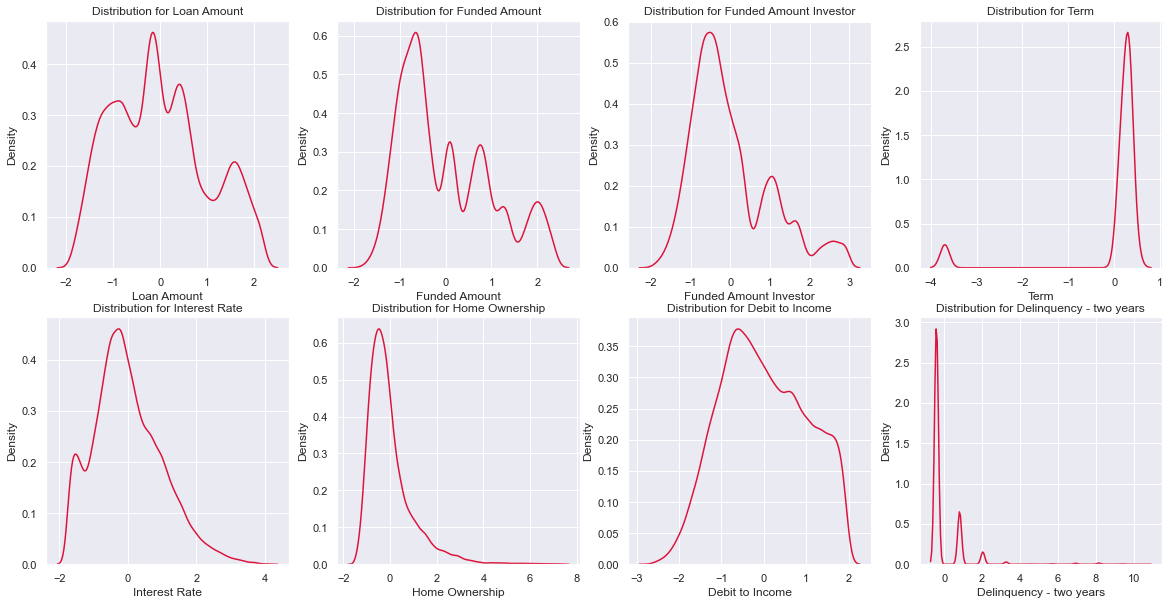

In [64]:
features=['Loan Amount', 'Funded Amount',
       'Funded Amount Investor', 'Term', 'Interest Rate',
       'Home Ownership', 'Debit to Income',
       'Delinquency - two years']

print(features)
check_distribution_dist(df_zscore,features)

['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Home Ownership', 'Debit to Income', 'Delinquency - two years']


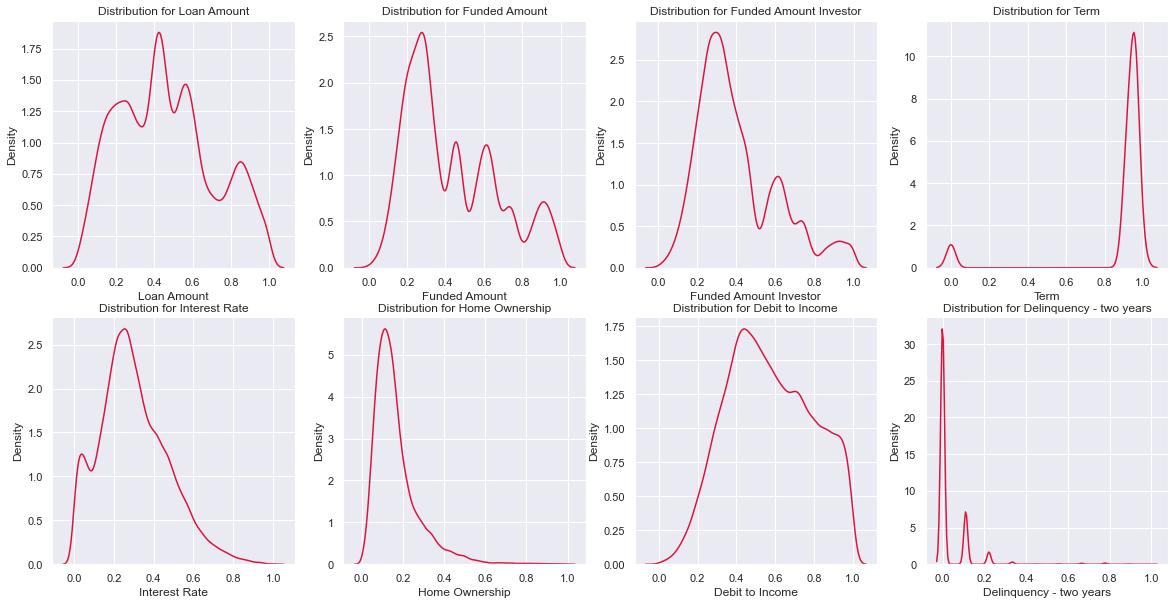

In [65]:
features=['Loan Amount', 'Funded Amount',
       'Funded Amount Investor', 'Term', 'Interest Rate',
      'Home Ownership', 'Debit to Income',
       'Delinquency - two years']

print(features)
check_distribution_dist(df_minmax,features)

['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term']


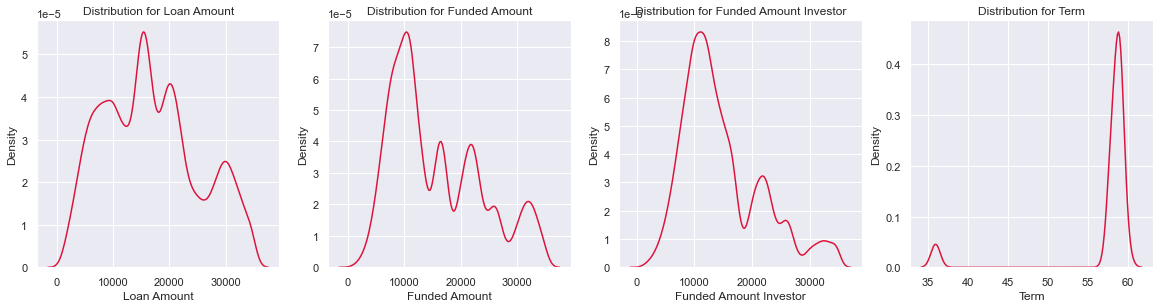

In [66]:
features=['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term']
print(features)
check_distribution_dist(train,features)

In [67]:
train=df_minmax
train.shape

(82819, 33)

# another way of encoding

In [ ]:
freq_train = df_train["Initial List Status"].value_counts() / df_train.shape[0]
df_train["Initial List Status"] = df_train["Initial List Status"].apply(lambda x : freq_train[x])

#freq_test = df_test.groupby("Initial List Status").size() / df_test.shape[0]
#df_test["Initial List Status"] = df_test["Initial List Status"].apply(lambda x : freq_test[x])

In [ ]:
# 4. Encoding Binary Categorical variables - Application Type

freq_app_train = df_train["Application Type"].value_counts(normalize = True)
#freq_app_test = df_test["Application Type"].value_counts(normalize = True)

df_train["Application Type"] = df_train["Application Type"].apply(lambda x : freq_app_train[x])
#df_test["Application Type"] = df_test["Application Type"].apply(lambda x : freq_app_test[x])

In [ ]:
# 5. Encoding Nominal Categorical variables -  Employment Duration (3) (Frequency encoding)

df_train_ed = df_train["Employment Duration"].value_counts(normalize = True).to_dict()
#df_test_ed = df_test["Employment Duration"].value_counts(normalize = True).to_dict()

df_train["Employment Duration"] = df_train["Employment Duration"].map(df_train_ed)
#df_test["Employment Duration"] = df_test["Employment Duration"].map(df_test_ed)

In [ ]:
# 6. Encoding Nominal Categorical variables - Verification Status (3) (Frequency encoding)

df_train_vs = df_train["Verification Status"].value_counts(normalize = True).to_dict()
df_test_vs = df_test["Verification Status"].value_counts(normalize = True).to_dict()

df_train["Verification Status"] = df_train["Verification Status"].map(df_train_vs)
df_test["Verification Status"] = df_test["Verification Status"].map(df_test_vs)

In [ ]:
# 7. Encoding Nominal Categorical variables - Loan Title (109) (Frequency encoding)

df_train_lt = df_train["Loan Title"].value_counts(normalize = True).to_dict()
df_test_lt = df_test["Loan Title"].value_counts(normalize = True).to_dict()

df_train["Loan Title"] = df_train["Loan Title"].map(df_train_lt)
df_test["Loan Title"] = df_test["Loan Title"].map(df_test_lt)

# another way of outlier detection

  Outliers & Anomalies

    Percentile Method
    IQR Method
    Box - Plot Method



In [ ]:
# 1. Outlier Detection - (Percentile Method)

df_train.quantile([0.01, 0.02, 0.03, 0.04, 0.05, 0.95, 0.96, 
                   0.97, 0.98, 0.99]).style.background_gradient(cmap = 'Set3')

In [ ]:
# 2. Outlier Detection - (IQR Method) (UDF)


def detect_outliers(data:pd.DataFrame, col_name:str, p = 1.5) ->int:
    ''' 
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# 2. Outlier Detection - (IQR Method)

iqr = 2

print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total = 0
for col in df_train.columns:
    if detect_outliers(df_train, col)[2] > 0:
        outliers = detect_outliers(df_train, col, iqr)[2]
        total += outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

There are multiple ways to deal with Outliers. Some of it are -

    Removing the outlier
    Capping & Flooring
    Mean/Median imputation**

Since the dataset is not huge and removing Outliers may hamper the quality of data.
We go for Capping and Flooring with 5% and 95%.

In [ ]:
# Outliers  (Capping & Flooring)

def outlier_cap(x):
    x = x.clip(upper = x.quantile(0.95))
    x = x.clip(lower = x.quantile(0.05))
    return(x)
#داده هایی که کمتر از 5 درصد داده های موجود و بیشتر از 95 درصد داده های موجود باشد جایگزین 5 درصد و 95 درصد میشوند

In [ ]:
df_train = df_train.apply(lambda x : outlier_cap(x))

In [ ]:
df_train.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99]) # ---> (After Outlier Capping & Flooring)

# another way of outlier detection

1

In [ ]:
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train.iloc[mask,:] , y_train.iloc[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)

In [ ]:
2

In [ ]:
# load the dataset

# summarize the shape of the training dataset
print(df_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(df_train)
# select all rows that are not outliers
mask = yhat != -1
df_train = df_train.iloc[mask,:]
# summarize the shape of the updated training dataset
print(df_train.shape)

# binning numeric features

In [101]:
def corr(df):
    train_cor1=df.corr()
    #train_cor1

    train_cor2=train_cor1.to_numpy()
    for i in range(train.shape[1]):
        for j in range(train.shape[1]):
            if train_cor2[i,j]>0.1:
                if train_cor2[i,j] != 1:
                    print(i , j)
                    print('\n')

In [69]:

def cal_mutual(df,cols):
    count=0
    for x in cols:
        count+=mutual_info_score(df[x], df["Loan Status"])
        
    return count

In [70]:
def check_better(df,cols):
    flag=0
    for x in cols:
        if mutual_info_score(df[x], df["Loan Status"]) > mutual_info_score(train[x], train["Loan Status"]):
            flag=1
    return flag

In [71]:
bin_cols=["Loan Amount","Funded Amount","Funded Amount Investor","Total Accounts","Batch Enrolled","Revolving Utilities","Inquires - six months","Term","Interest Rate","Home Ownership","Debit to Income","Delinquency - two years","Open Account","Public Record","Revolving Balance","Total Accounts","Total Received Interest","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Current Balance","Total Revolving Credit Limit"]
def kbinsdis(n, df):
    est = KBinsDiscretizer(n_bins=n, encode='ordinal', strategy='uniform')
    est.fit(df[["Loan Amount","Funded Amount","Funded Amount Investor","Total Accounts","Batch Enrolled","Revolving Utilities","Inquires - six months","Interest Rate","Home Ownership","Debit to Income","Delinquency - two years","Open Account","Public Record","Revolving Balance","Total Accounts","Total Received Interest","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Current Balance","Total Revolving Credit Limit"]])

    df[["Loan Amount","Funded Amount","Funded Amount Investor","Total Accounts","Batch Enrolled","Revolving Utilities","Inquires - six months","Interest Rate","Home Ownership","Debit to Income","Delinquency - two years","Open Account","Public Record","Revolving Balance","Total Accounts","Total Received Interest","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Current Balance","Total Revolving Credit Limit"]] = est.transform(df[["Loan Amount","Funded Amount","Funded Amount Investor","Total Accounts","Batch Enrolled","Revolving Utilities","Inquires - six months","Interest Rate","Home Ownership","Debit to Income","Delinquency - two years","Open Account","Public Record","Revolving Balance","Total Accounts","Total Received Interest","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Current Balance","Total Revolving Credit Limit"]])
    return df

KBinsDiscretizer method

In [72]:
cal_mutual(train,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\an

5.789917765152711

In [73]:
corr(train)

0 3


3 0


3 12


12 3


17 31


23 24


24 23


31 17




In [74]:
kbins_3=train.copy()
kbins_3=kbinsdis(3,kbins_3)
kbins_3

check_better(kbins_3,bin_cols)
cal_mutual(kbins_3,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\an

0.012384286181374486

In [75]:
corr(kbins_3)

0 3


3 0


23 24


24 23




<AxesSubplot:>

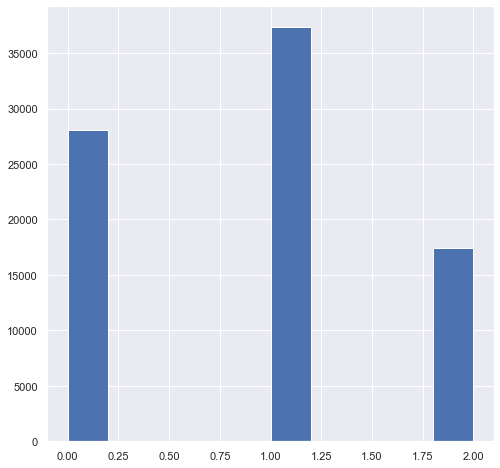

In [76]:
kbins_3["Loan Amount"].hist()

In [77]:
kbins_4=train.copy()
kbins_4=kbinsdis(4,kbins_4)
kbins_4
#check_better(kbins_4,bin_cols)
cal_mutual(kbins_4,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.013794032014418965

In [78]:
corr(kbins_4)

23 24


24 23




<AxesSubplot:>

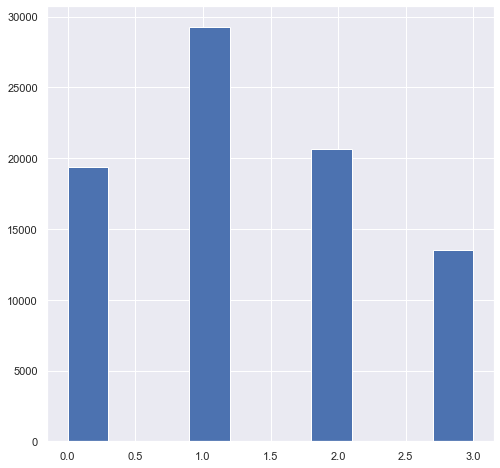

In [79]:
kbins_4["Loan Amount"].hist()

In [80]:
kbins_5=train.copy()
kbins_5=kbinsdis(5,kbins_5)
kbins_5
#check_better(kbins_5,bin_cols)
cal_mutual(kbins_5,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


0.01452630361000065

In [81]:
corr(kbins_5)

3 12


12 3


23 24


24 23




<AxesSubplot:>

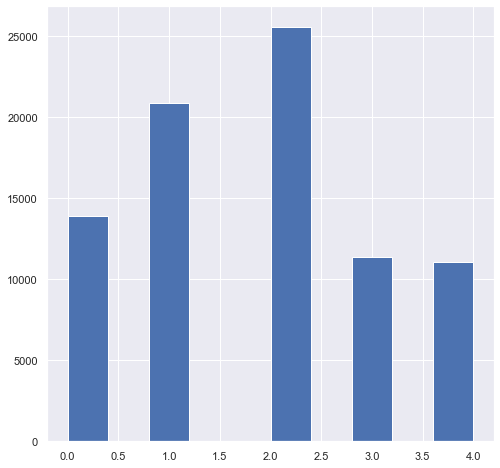

In [82]:
kbins_5["Loan Amount"].hist()

# Qcut

In [83]:
bin_cols=["Loan Amount","Funded Amount","Funded Amount Investor","Total Accounts","Batch Enrolled","Revolving Utilities","Inquires - six months","Term","Interest Rate","Home Ownership","Debit to Income","Delinquency - two years","Open Account","Public Record","Revolving Balance","Total Accounts","Total Received Interest","Total Received Late Fee","Recoveries","Collection Recovery Fee","Collection 12 months Medical","Last week Pay","Total Collection Amount","Total Current Balance","Total Revolving Credit Limit"]

def qcutdis(df, column,n):

    df[column] = pd.qcut(df[column],n, labels = False,duplicates='drop' )
    return df
#def qcutdis(n, df):
 #   for x in bin_cols:
  #      df=pd.qcut(df["Loan Amount"], q=n)
   # return df

In [84]:
qcut_3 = train.copy()
for i in bin_cols:
    
    qcut_3 = qcutdis(qcut_3, i ,3)

check_better(qcut_3,bin_cols)
cal_mutual(qcut_3,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\an

0.015455797819113368

In [85]:
corr(qcut_3)

22 23


23 22




<AxesSubplot:>

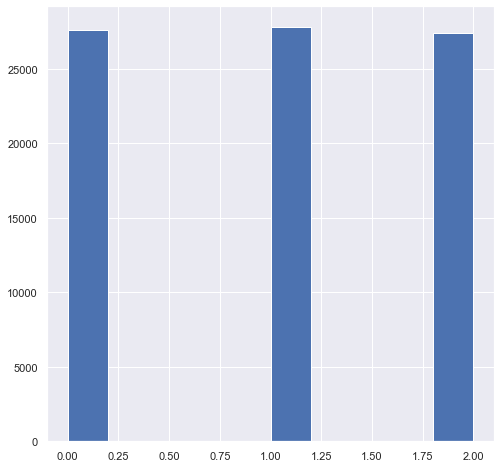

In [86]:
qcut_3["Loan Amount"].hist()

In [87]:
qcut_4 = train.copy()
for i in bin_cols:
    
    qcut_4 = qcutdis(qcut_4, i ,4)

check_better(qcut_4,bin_cols)
cal_mutual(qcut_4,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\an

0.017877685930528783

<AxesSubplot:>

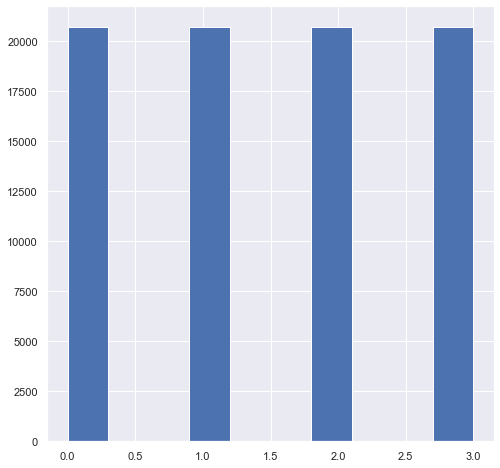

In [88]:
qcut_4["Loan Amount"].hist()

In [89]:
corr(qcut_4)

22 23


22 24


22 29


23 22


24 22


29 22




In [90]:
qcut_5 = train.copy()
for i in bin_cols:
    
    qcut_5 = qcutdis(qcut_5, i ,5)

check_better(qcut_5,bin_cols)
cal_mutual(qcut_5,bin_cols)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\cluster\_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
C:\Users\acer\an

0.02058245157590311

<AxesSubplot:>

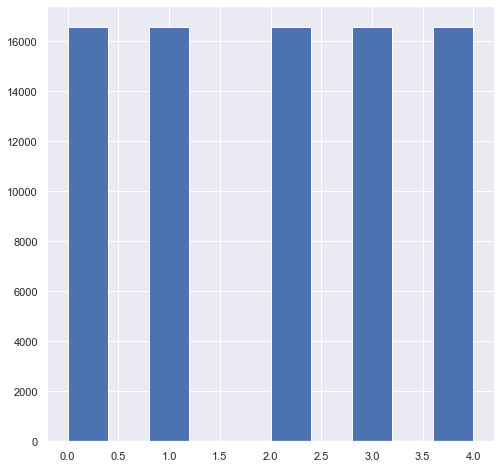

In [91]:
qcut_5["Loan Amount"].hist()

In [92]:
corr(qcut_5)

22 23


22 24


22 29


23 22


23 24


24 22


24 23


29 22




# EDA

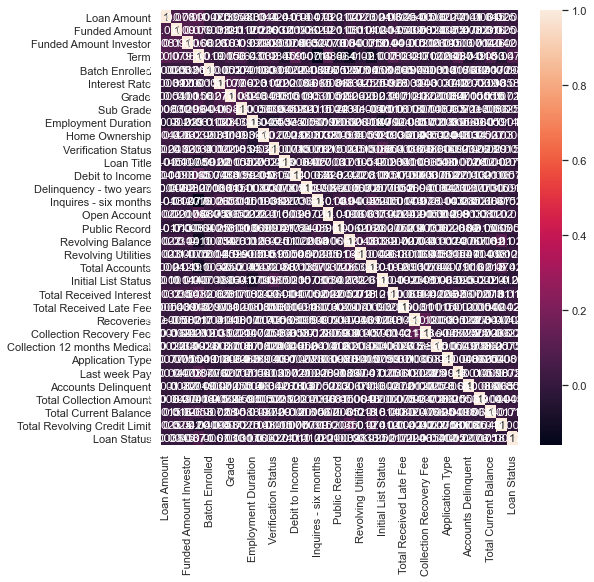

In [93]:
plot=sns.heatmap(train.corr(),annot=True)

In [94]:
corr(train)

0 3


3 0


3 12


12 3


17 31


23 24


24 23


31 17




In [95]:
#sns.pairplot(train, hue ='Loan Status')

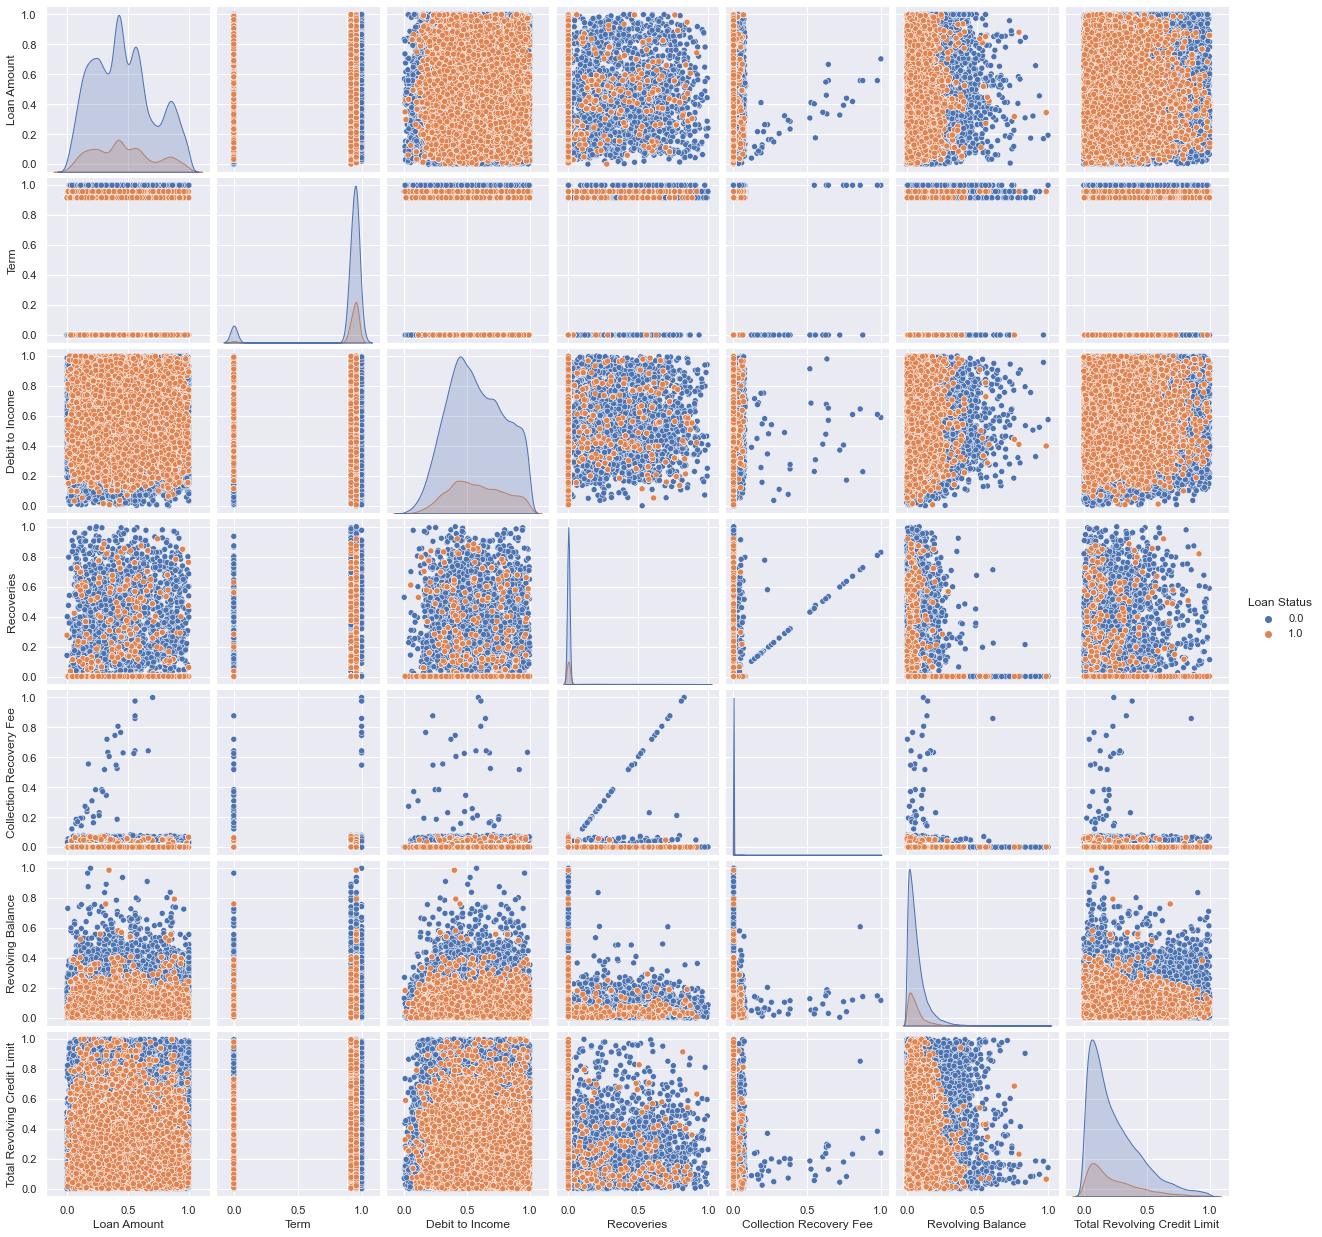

In [97]:
sns.pairplot(
    train,
    hue ='Loan Status',
    x_vars=["Loan Amount", "Term", "Debit to Income","Recoveries","Collection Recovery Fee","Revolving Balance","Total Revolving Credit Limit"],
    y_vars=["Loan Amount", "Term", "Debit to Income","Recoveries","Collection Recovery Fee","Revolving Balance","Total Revolving Credit Limit"],
)

In [96]:
feature_target=df_zscore.groupby('Loan Status')[["Loan Amount", "Term", "Debit to Income","Recoveries","Collection Recovery Fee","Revolving Balance","Total Revolving Credit Limit"]].agg('mean').reset_index()
feature_target=feature_target.T
feature_target=feature_target.iloc[1:,:]
feature_target.columns=['0','1']
feature_target.style.background_gradient()

,0,1
Loan Amount,-0.001746,0.008413
Term,-0.032447,0.156355
Debit to Income,-0.004925,0.023730
Recoveries,-0.002117,0.010201
Collection Recovery Fee,0.002454,-0.011824
Revolving Balance,0.012838,-0.061863
Total Revolving Credit Limit,0.003046,-0.014676


<AxesSubplot:>

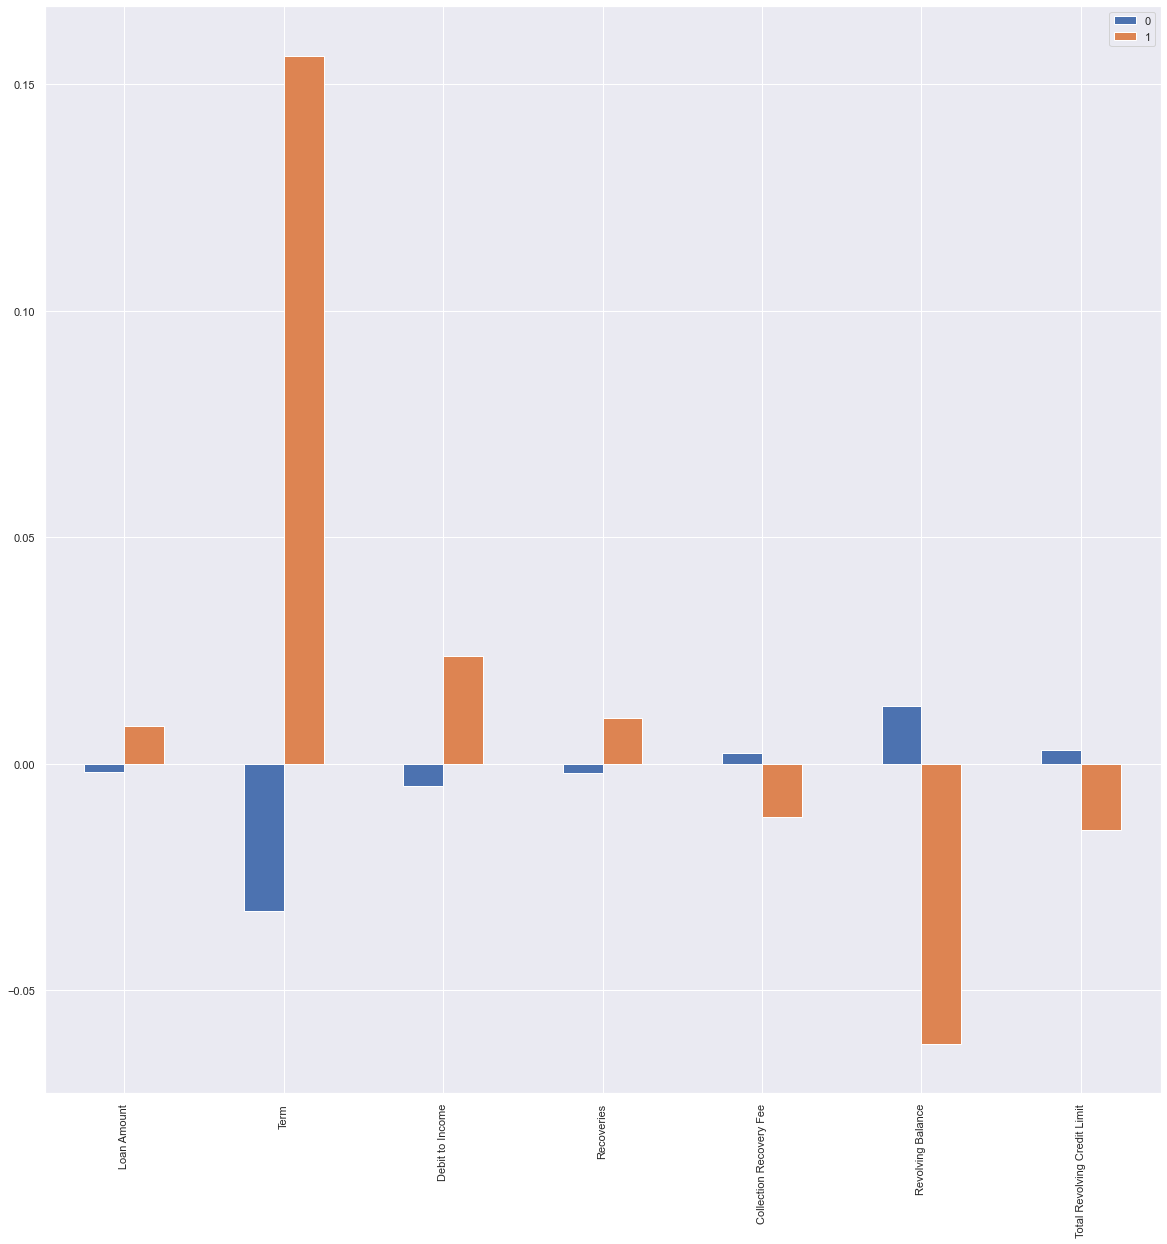

In [97]:
feature_target.plot(kind='bar',figsize=(20,20))

In [98]:
Lamount_term_Debit_recover=[]
grade_subgrade=[]
fee_bal_credit=[]
for row in range(0,train.shape[0]):
    Lamount_term_Debit_recover.append(train.iloc[row,0]+train.iloc[row,3]+train.iloc[row,12]+train.iloc[row,23])
    grade_subgrade.append(train.iloc[row,6]+train.iloc[row,7])
    fee_bal_credit.append(train.iloc[row,17]+train.iloc[row,24]+train.iloc[row,31])
train['Lamount_term_Debit_recover']=Lamount_term_Debit_recover
train['grade_subgrade']=grade_subgrade
train['fee_bal_credit']=fee_bal_credit

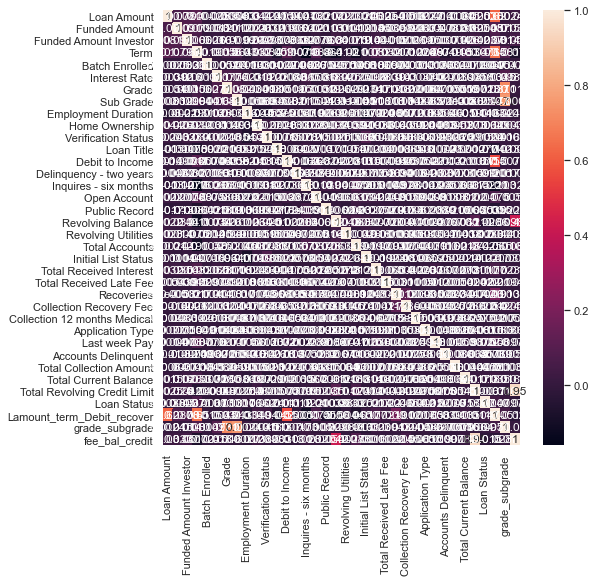

In [99]:
plot=sns.heatmap(train.corr(),annot=True)

In [102]:
corr(train)

0 3


0 33


3 0


3 12


3 33


6 34


7 34


12 3


12 33


17 31


17 35


23 24


23 33


24 23


31 17


31 35


33 0


33 3


33 12


33 23


34 6


34 7


35 17


35 31




these features dont make stronger correlation between target and features so they are useless

In [105]:
train=train.drop(columns=['Lamount_term_Debit_recover','grade_subgrade','fee_bal_credit'])

In [106]:
train.shape

(82819, 33)

# overlay plot

<AxesSubplot:xlabel='Loan Amount'>

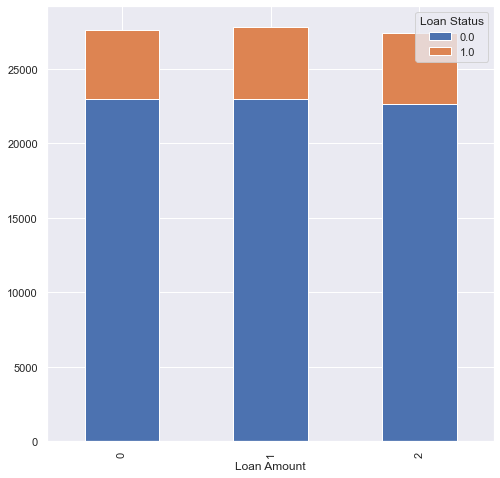

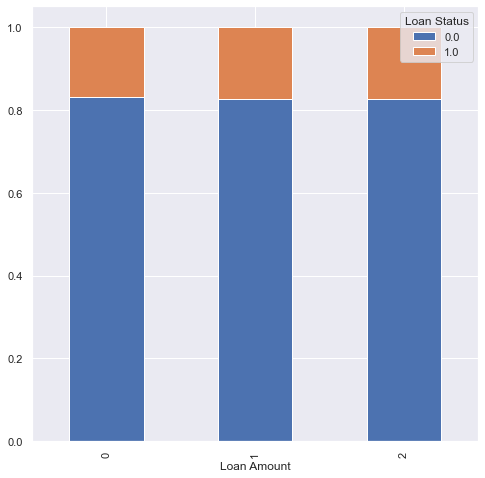

In [107]:
crosstab_01 = pd.crosstab(qcut_3["Loan Amount"], qcut_3["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Loan Amount'>

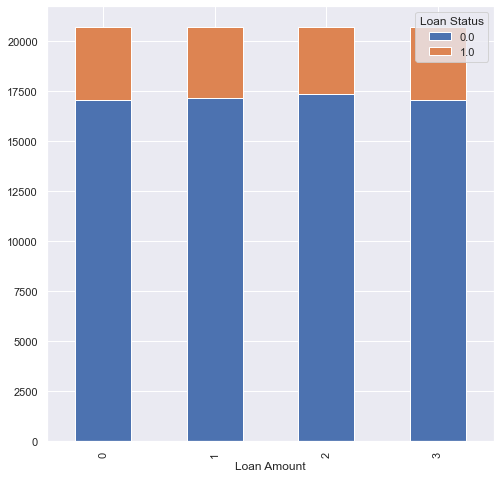

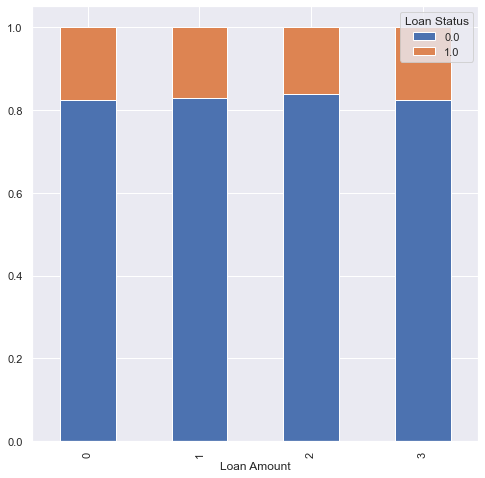

In [109]:
crosstab_01 = pd.crosstab(qcut_4["Loan Amount"], qcut_4["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Loan Amount'>

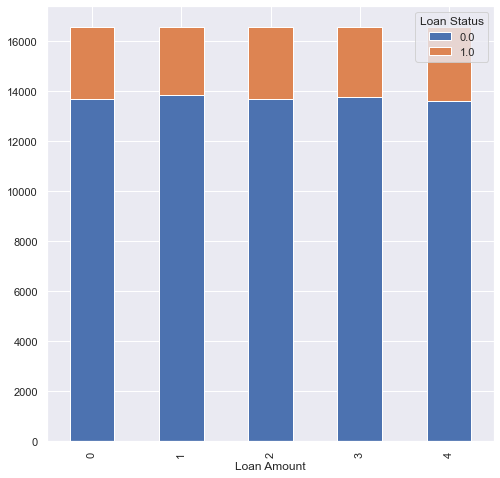

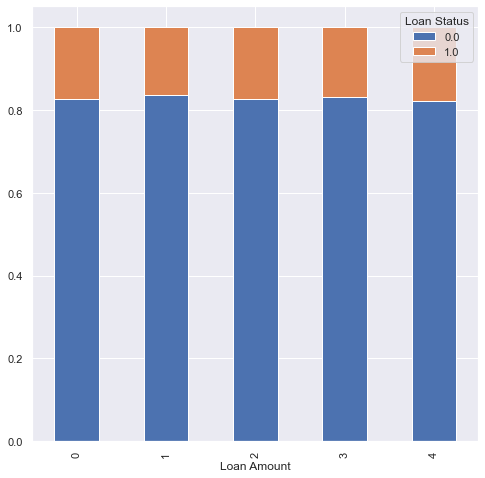

In [110]:
crosstab_01 = pd.crosstab(qcut_5["Loan Amount"], qcut_5["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Loan Amount'>

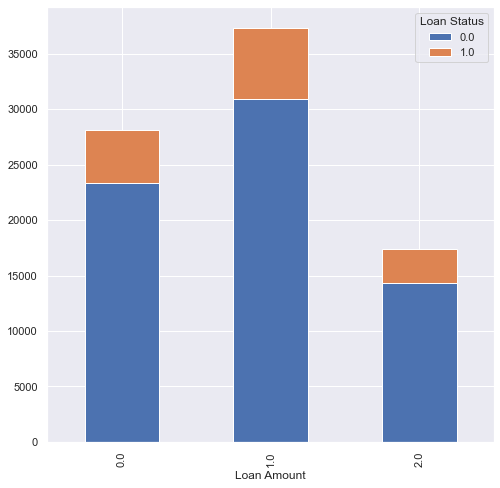

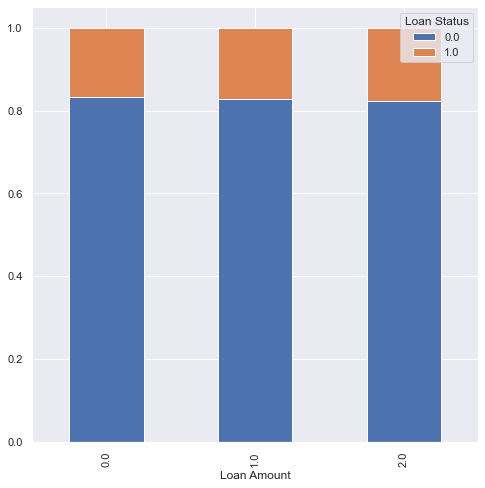

In [111]:
crosstab_01 = pd.crosstab(kbins_3["Loan Amount"], kbins_3["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Loan Amount'>

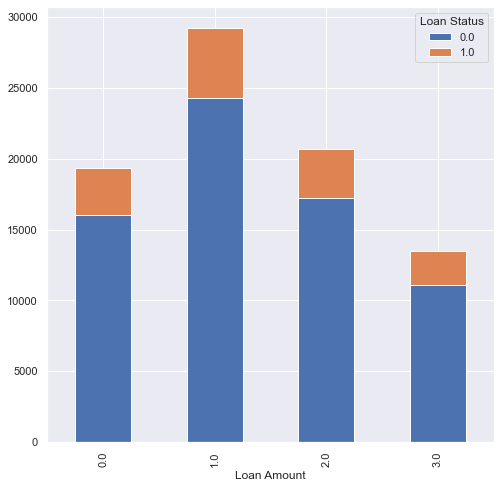

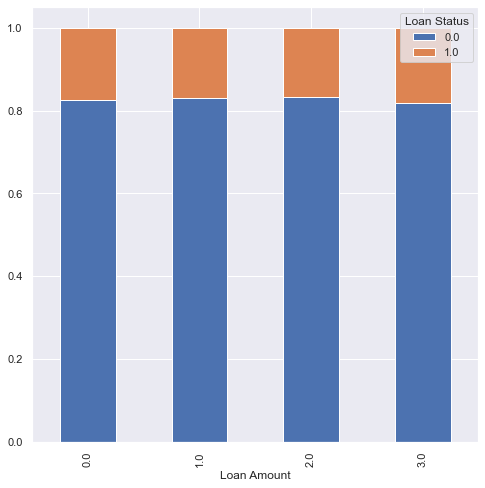

In [112]:
crosstab_01 = pd.crosstab(kbins_4["Loan Amount"], kbins_4["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

<AxesSubplot:xlabel='Loan Amount'>

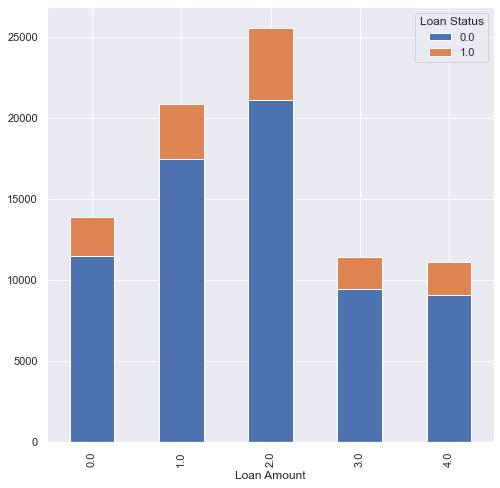

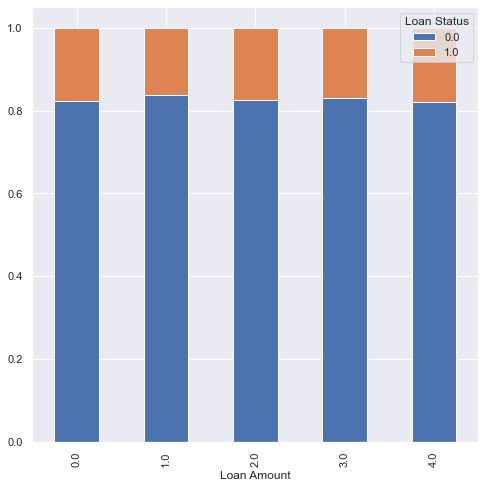

In [113]:
crosstab_01 = pd.crosstab(kbins_5["Loan Amount"], kbins_5["Loan Status"])
crosstab_01.plot(kind='bar', stacked = True)
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis = 0)
crosstab_norm.plot(kind='bar', stacked = True)

In [ ]:
#df_majority = df_train[df_train["Loan Status"]==0]
#df_minority = df_train[df_train["Loan Status"]==1]

#Upsample minority class
#df_minority_upsampled = resample(df_minority, 
 #                                replace=True,     # sample with replacement
  #                              n_samples=96348,    # to match majority class
   #                            random_state=123) # reproducible results

#Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority, df_minority_upsampled])

#Display new class counts
#df_upsampled["Loan Status"].value_counts()

# modeling

this method returns k best features for modeling but because of very little correlation between features it is not good enough for our dataset

In [ ]:
# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(X, Y, chi2, 26)

New_X

In [108]:
x=train.drop('Loan Status',axis=1)
Y=train['Loan Status']

In [109]:
x

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
29302,0.132824,0.636912,0.379279,0.958333,0.520882,0.571208,0.500000,1.000000,1.0,0.147062,...,0.001273,0.000887,0.001336,0.0,0.0,0.037267,0.0,0.000997,0.331390,0.418610
9344,0.278324,0.218412,0.152494,0.958333,0.948192,0.284946,0.666667,0.166667,0.0,0.091519,...,0.001073,0.000366,0.001903,0.0,0.0,0.838509,0.0,0.000923,0.374383,0.075309
15331,0.527647,0.647912,0.449704,0.958333,0.614441,0.267134,0.000000,0.666667,0.5,0.606410,...,0.001308,0.001051,0.001720,0.0,0.0,0.378882,0.0,0.002253,0.342811,0.036692
34892,0.506529,0.755471,0.567431,0.958333,0.272935,0.357969,0.333333,0.666667,0.0,0.254715,...,0.002259,0.000294,0.000527,0.0,0.0,0.285714,0.0,0.001588,0.214363,0.084566
23950,0.411765,0.411765,0.411765,0.000000,0.640173,0.116871,0.000000,0.000000,1.0,0.090288,...,0.000000,0.000000,0.000000,1.0,0.0,0.161491,0.0,0.000000,0.036056,0.117581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54681,0.434294,0.609412,0.522508,0.958333,0.686241,0.183163,0.333333,0.500000,0.0,0.251884,...,0.000836,0.002131,0.001797,0.0,0.0,0.142857,0.0,0.000480,0.255422,0.203276
40377,0.595412,0.132265,0.445400,0.958333,0.355699,0.261461,0.333333,0.333333,0.0,0.038759,...,0.000674,0.001523,0.001281,0.0,0.0,0.378882,0.0,0.000332,0.047163,0.020369
40700,0.212647,0.569353,0.251829,0.958333,0.403193,0.304400,0.333333,0.166667,1.0,0.123440,...,0.001278,0.000162,0.001100,0.0,0.0,0.751553,0.0,0.002216,0.245673,0.308280
40604,0.120382,0.957824,0.248648,0.916667,0.325301,0.302228,0.166667,0.500000,1.0,0.128815,...,0.000740,0.000706,0.001853,0.0,0.0,0.416149,0.0,0.001477,0.019758,0.154618


In [110]:
test_x=test.drop('Loan Status',axis=1)
test_target=test['Loan Status']

test_x

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit
395,21617,22839,9655.707318,59,2428731,13.555825,2,3,0,84602.27410,...,0.031051,2.792198,0.904790,0,0,125,0,26,238626,1019
50967,19902,26502,25956.765740,59,2003848,9.937289,1,3,2,44270.74025,...,0.104836,3.169052,0.292891,0,0,64,0,41,523454,22850
60933,19606,16498,13187.742640,59,5924421,12.037843,6,1,2,120056.70610,...,0.051599,0.736980,0.839886,0,0,41,0,51,443469,47369
34081,16869,6718,13098.498040,59,4694572,10.501494,3,2,0,73506.63484,...,0.052367,4.655170,1.415852,0,0,85,0,19,195900,27803
58477,22285,8395,10178.962090,58,1586599,24.749978,4,1,2,55025.18096,...,0.076864,2.702867,0.508888,0,0,101,0,26,156834,13672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3450,15013,21588,13959.111050,59,1586599,17.773956,3,3,0,45580.92134,...,0.106719,4.360287,1.458525,0,0,83,0,15,91942,35884
14739,9072,22907,9013.713393,58,5714674,14.320018,3,1,0,110528.17750,...,0.101364,1.298082,1.169064,0,0,137,0,39,41950,30624
7467,19343,11304,31944.402910,58,2803411,12.612341,2,4,0,118903.95050,...,0.054162,2.248683,15.196369,0,0,15,0,45,13166,5231
58306,17121,20931,8481.686065,59,1930365,12.529214,3,4,1,70833.37327,...,0.043113,0.551778,1.364279,0,0,67,0,367,232435,21609


In [111]:
X_train,X_test,y_train,y_test=train_test_split(x,Y,test_size=0.2)

In [112]:
y_test

14166    0.0
36009    0.0
49198    0.0
3433     0.0
6876     0.0
        ... 
6809     1.0
29325    1.0
2365     0.0
925      0.0
49696    0.0
Name: Loan Status, Length: 16564, dtype: float64

In [113]:
y_test.value_counts(normalize = True).round(2) * 100 


0.0    83.0
1.0    17.0
Name: Loan Status, dtype: float64

In [114]:
y_train.value_counts(normalize = True).round(2) * 100 

0.0    83.0
1.0    17.0
Name: Loan Status, dtype: float64

# baseline

In [146]:
dummy_clf = DummyClassifier(strategy="most_frequent", random_state=42)
# train a model
dummy_clf.fit(X_train, y_train)
y_pred_test=dummy_clf.predict(X_test)

# get accuracy score
accuracy=dummy_clf.score(X_test, y_test)
print(accuracy)

target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

0.8261289543588505
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     13684
           1       0.00      0.00      0.00      2880

    accuracy                           0.83     16564
   macro avg       0.41      0.50      0.45     16564
weighted avg       0.68      0.83      0.75     16564



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
dummy_clf = DummyClassifier(strategy="uniform", random_state=42)
# train a model
dummy_clf.fit(X_train, y_train)
# get accuracy score
dummy_clf.score(X_test, y_test)

0.49897367785559044

In [117]:
dummy_clf = DummyClassifier(strategy="prior", random_state=42)
# train a model
dummy_clf.fit(X_train, y_train)
# get accuracy score
dummy_clf.score(X_test, y_test)

0.8261289543588505

In [118]:
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
# train a model
dummy_clf.fit(X_train, y_train)
# get accuracy score
dummy_clf.score(X_test, y_test)

0.7153465346534653

In [119]:
def plot_confusion_matrix(y,y_predict):
 cm = confusion_matrix(y, y_predict)
 ax= plt.subplot()
 sns.heatmap(cm, cmap='coolwarm',annot=True,fmt = " ", ax = ax);
 ax.set_xlabel('Predicted labels')
 ax.set_ylabel('True labels')
 ax.set_title('Confusion Matrix');
 ax.xaxis.set_ticklabels(['1','0']); ax.yaxis.set_ticklabels(['1','0'])

In [125]:
#model_function(RandomForestClassifier())

model=RandomForestClassifier()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 1.0
accuracy on test 0.9834581019077517
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     13690
           1       1.00      0.90      0.95      2874

    accuracy                           0.98     16564
   macro avg       0.99      0.95      0.97     16564
weighted avg       0.98      0.98      0.98     16564



In [126]:
#model_function(KNeighborsClassifier(n_neighbors=5))

model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 0.9002641310089805
accuracy on test 0.8288456894469934
              precision    recall  f1-score   support

           0       0.90      0.89      0.90     13690
           1       0.51      0.52      0.51      2874

    accuracy                           0.83     16564
   macro avg       0.70      0.71      0.71     16564
weighted avg       0.83      0.83      0.83     16564



Iteration 1, loss = 0.46573273
Iteration 2, loss = 0.45460541
Iteration 3, loss = 0.45307449
Iteration 4, loss = 0.45214236
Iteration 5, loss = 0.45133917
Iteration 6, loss = 0.45071725
Iteration 7, loss = 0.44979356
Iteration 8, loss = 0.44872073
Iteration 9, loss = 0.44767341
Iteration 10, loss = 0.44699493
Iteration 11, loss = 0.44596936
Iteration 12, loss = 0.44456109
Iteration 13, loss = 0.44355803
Iteration 14, loss = 0.44290921
Iteration 15, loss = 0.44170628
Iteration 16, loss = 0.44095081
Iteration 17, loss = 0.44025578
Iteration 18, loss = 0.43914226
Iteration 19, loss = 0.43789939
Iteration 20, loss = 0.43728539
Iteration 21, loss = 0.43628851
Iteration 22, loss = 0.43556710
Iteration 23, loss = 0.43444849
Iteration 24, loss = 0.43372389
Iteration 25, loss = 0.43278197
Iteration 26, loss = 0.43230203
Iteration 27, loss = 0.43141577
Iteration 28, loss = 0.43104189
Iteration 29, loss = 0.42986129
Iteration 30, loss = 0.42933773
Iteration 31, loss = 0.42861990
Iteration 32, los

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on train 0.8432269262697155
accuracy on test 0.8223255252354503
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     13690
           1       0.45      0.12      0.19      2874

    accuracy                           0.82     16564
   macro avg       0.65      0.54      0.54     16564
weighted avg       0.77      0.82      0.78     16564



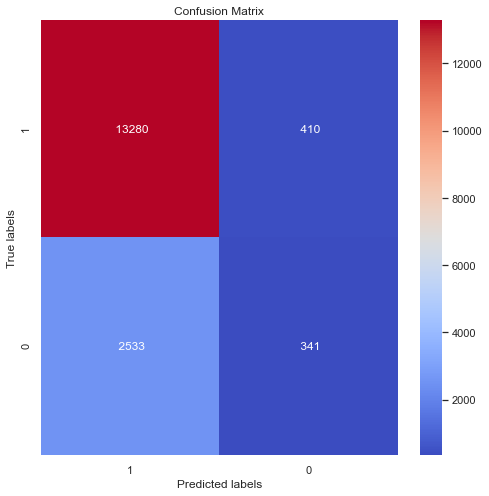

In [127]:
#model_function(MLPClassifier(verbose = True))

model=MLPClassifier(verbose = True)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

In [ ]:
#model_function(SVC())

model=SVC()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 0.8285563353709154
accuracy on test 0.8264911857039362
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     13690
           1       0.00      0.00      0.00      2874

    accuracy                           0.83     16564
   macro avg       0.41      0.50      0.45     16564
weighted avg       0.68      0.83      0.75     16564



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


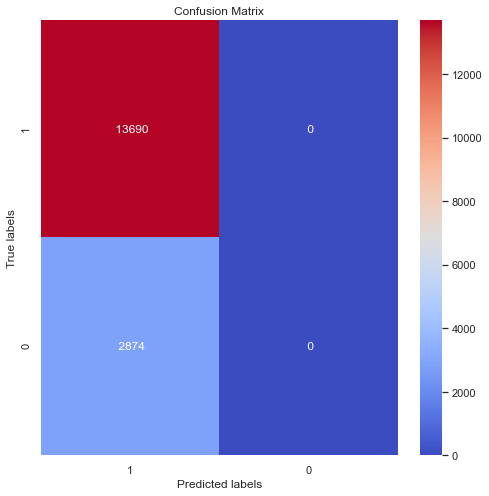

In [124]:
#model_function(MultinomialNB())

model=MultinomialNB()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 0.8873594445702211
accuracy on test 0.861446510504709
              precision    recall  f1-score   support

           0       0.86      1.00      0.92     13690
           1       0.93      0.22      0.35      2874

    accuracy                           0.86     16564
   macro avg       0.90      0.61      0.64     16564
weighted avg       0.87      0.86      0.82     16564



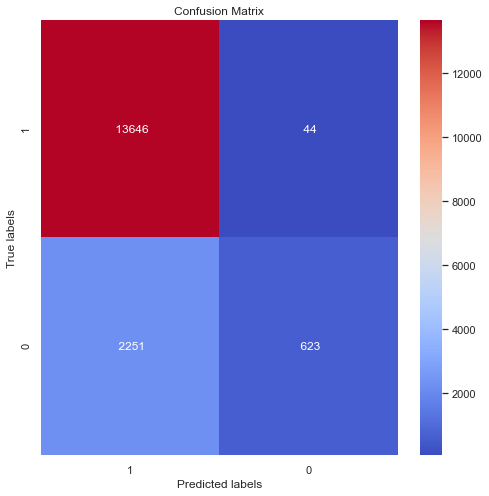

In [142]:
#model_function(XGBClassifier())

model=XGBClassifier()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 1.0
accuracy on test 0.9150567495773968
              precision    recall  f1-score   support

           0       0.98      0.92      0.95     13690
           1       0.69      0.92      0.79      2874

    accuracy                           0.92     16564
   macro avg       0.84      0.92      0.87     16564
weighted avg       0.93      0.92      0.92     16564



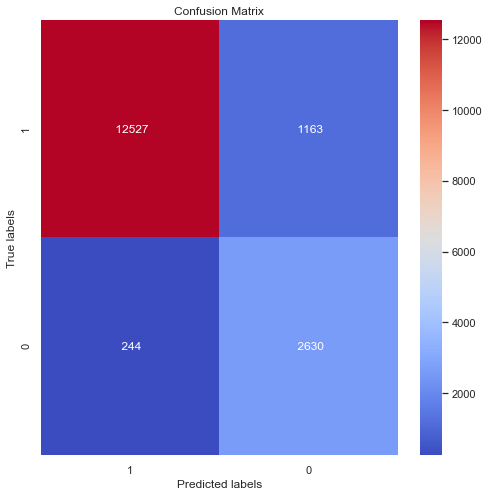

In [140]:
#model_function(DecisionTreeClassifier())

model=DecisionTreeClassifier()
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

In [129]:
def fit(mlp, param_grid,  x, y):
    
    model = model_selection.RandomizedSearchCV(
                estimator = mlp,
                param_distributions = param_grid,
                scoring = 'accuracy',
                verbose = 10,
                n_jobs = -1,
                cv = 5)
                
    model.fit(x, y)
    print(f"Best score: {model.best_score_}")
    print("Best parameters set:")
    best_parameters = model.best_estimator_.get_params()  
    for param_name in sorted(param_grid.keys()):  
        print(f"\t{param_name}: {best_parameters[param_name]}")

In [138]:
NB=MultinomialNB()

In [140]:
parameters2 = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
          'fit_prior': [True, False],
          'class_prior': [None, [0.1,]* 2, ]
         }

In [141]:
fit(NB, parameters2, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.8286468945739944
Best parameters set:
	alpha: 0.5
	class_prior: None
	fit_prior: True


In [148]:
params = {
    'alpha' : 1,
    'class_prior' : None,
    'fit_prior': True,
}

accuracy on train 0.8286468945739944
accuracy on test 0.8261289543588505
              precision    recall  f1-score   support

           0       0.83      1.00      0.90     13684
           1       0.00      0.00      0.00      2880

    accuracy                           0.83     16564
   macro avg       0.41      0.50      0.45     16564
weighted avg       0.68      0.83      0.75     16564



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


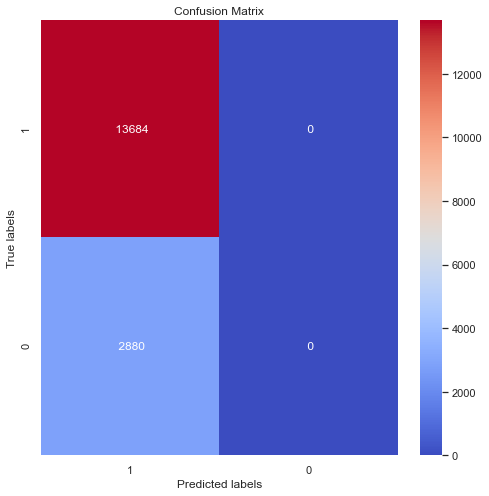

In [144]:
model=MultinomialNB(**params)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 0.8286468945739944
accuracy on test 0.930172234903507
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18023
           1       0.01      0.00      0.00      1253

    accuracy                           0.93     19276
   macro avg       0.47      0.50      0.48     19276
weighted avg       0.87      0.93      0.90     19276



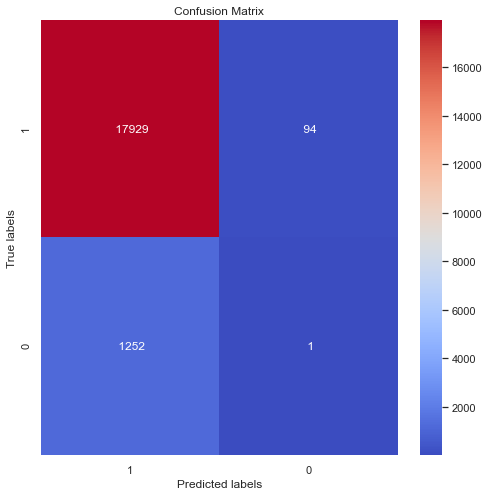

In [149]:
#for final test
model=MultinomialNB(**params)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(test_x)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(test_target,y_pred_test.round()))

plot_confusion_matrix(test_target,y_pred_test)
target = ['0', '1']
print(classification_report(test_target, y_pred_test, target_names=target))

In [129]:
mlp = MLPClassifier(max_iter=100)

In [130]:
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [131]:
fit(mlp, parameter_space, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.8317259074786808
Best parameters set:
	activation: tanh
	alpha: 0.0001
	hidden_layer_sizes: (50, 50, 50)
	learning_rate: adaptive
	solver: adam


C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [122]:
params = {
    'solver' : 'adam',
    'activation' : 'tanh',
    'alpha' : 0.0001,
    'hidden_layer_sizes' : (50, 50, 50),
    'learning_rate' : 'adaptive',
    'verbose' : True,
}

Iteration 1, loss = 0.45769024
Iteration 2, loss = 0.45519809
Iteration 3, loss = 0.45436084
Iteration 4, loss = 0.45346312
Iteration 5, loss = 0.45292283
Iteration 6, loss = 0.45248800
Iteration 7, loss = 0.45189774
Iteration 8, loss = 0.45128909
Iteration 9, loss = 0.45120027
Iteration 10, loss = 0.45069569
Iteration 11, loss = 0.45023180
Iteration 12, loss = 0.44996508
Iteration 13, loss = 0.44997977
Iteration 14, loss = 0.44909080
Iteration 15, loss = 0.44855117
Iteration 16, loss = 0.44806175
Iteration 17, loss = 0.44734200
Iteration 18, loss = 0.44703203
Iteration 19, loss = 0.44612199
Iteration 20, loss = 0.44528712
Iteration 21, loss = 0.44440323
Iteration 22, loss = 0.44352722
Iteration 23, loss = 0.44239908
Iteration 24, loss = 0.44163818
Iteration 25, loss = 0.44074997
Iteration 26, loss = 0.43987910
Iteration 27, loss = 0.43844761
Iteration 28, loss = 0.43753784
Iteration 29, loss = 0.43633480
Iteration 30, loss = 0.43521804
Iteration 31, loss = 0.43430163
Iteration 32, los

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on train 0.9145573918949513
accuracy on test 0.8527529582226515
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     13690
           1       0.59      0.49      0.54      2874

    accuracy                           0.85     16564
   macro avg       0.74      0.71      0.72     16564
weighted avg       0.84      0.85      0.85     16564



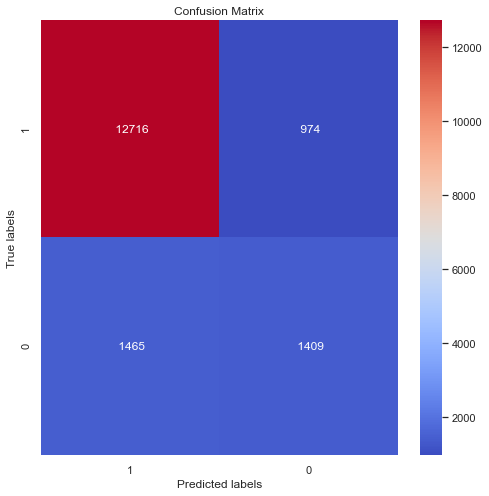

In [134]:
#model_function(MLPClassifier(**params))

model=MLPClassifier(**params)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

plot_confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

Iteration 1, loss = 0.45910291
Iteration 2, loss = 0.45542710
Iteration 3, loss = 0.45444369
Iteration 4, loss = 0.45381106
Iteration 5, loss = 0.45351401
Iteration 6, loss = 0.45314544
Iteration 7, loss = 0.45229329
Iteration 8, loss = 0.45177849
Iteration 9, loss = 0.45133071
Iteration 10, loss = 0.45040459
Iteration 11, loss = 0.45008459
Iteration 12, loss = 0.44949211
Iteration 13, loss = 0.44888704
Iteration 14, loss = 0.44826816
Iteration 15, loss = 0.44793195
Iteration 16, loss = 0.44705511
Iteration 17, loss = 0.44677213
Iteration 18, loss = 0.44584922
Iteration 19, loss = 0.44533043
Iteration 20, loss = 0.44433274
Iteration 21, loss = 0.44377049
Iteration 22, loss = 0.44284770
Iteration 23, loss = 0.44210964
Iteration 24, loss = 0.44142683
Iteration 25, loss = 0.44062945
Iteration 26, loss = 0.43952053
Iteration 27, loss = 0.43872792
Iteration 28, loss = 0.43781066
Iteration 29, loss = 0.43698076
Iteration 30, loss = 0.43616764
Iteration 31, loss = 0.43527364
Iteration 32, los

C:\Users\acer\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy on train 0.9089729077050789
accuracy on test 0.930327868852459
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     18023
           1       0.08      0.01      0.01      1253

    accuracy                           0.93     19276
   macro avg       0.51      0.50      0.49     19276
weighted avg       0.88      0.93      0.90     19276



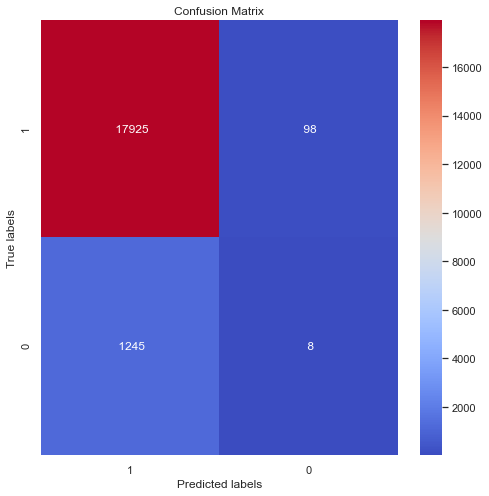

In [123]:
#for final test
model=MLPClassifier(**params)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(test_x)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(test_target,y_pred_test.round()))

plot_confusion_matrix(test_target,y_pred_test)
target = ['0', '1']
print(classification_report(test_target, y_pred_test, target_names=target))

In [135]:
knnn=KNeighborsClassifier(n_neighbors=5)

In [136]:
param_dist = {'n_neighbors': list(range(1,20)),
              'weights':['uniform', 'distance'] ,
             'leaf_size':list(range(2,10)),
             }

In [137]:
fit(knnn, param_dist, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.961648177496038
Best parameters set:
	leaf_size: 9
	n_neighbors: 19
	weights: distance


In [125]:
param_dist1 = {'n_neighbors': 19,
              'weights':'distance' ,
             'leaf_size':9,
             }

In [152]:
model=KNeighborsClassifier(**param_dist1)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 1.0
accuracy on test 0.9645013281815986
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13690
           1       0.89      0.91      0.90      2874

    accuracy                           0.96     16564
   macro avg       0.94      0.94      0.94     16564
weighted avg       0.96      0.96      0.96     16564



In [126]:
#for final test
model=KNeighborsClassifier(**param_dist1)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(test_x)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(test_target,y_pred_test.round()))

confusion_matrix(test_target,y_pred_test)
target = ['0', '1']
print(classification_report(test_target, y_pred_test, target_names=target))

accuracy on train 1.0
accuracy on test 0.9349968873210209
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     18023
           1       0.00      0.00      0.00      1253

    accuracy                           0.93     19276
   macro avg       0.47      0.50      0.48     19276
weighted avg       0.87      0.93      0.90     19276



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [154]:
xg_model=XGBClassifier()

In [144]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [145]:
fit(xg_model, parameters, X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best score: 0.8449173647271906
Best parameters set:
	learning_rate: 0.1
	max_depth: 9
	n_estimators: 100


In [127]:
parameters1 = {
    'max_depth': 9,
    'n_estimators': 100,
    'learning_rate': 0.1
}

In [147]:
model=XGBClassifier(**parameters1)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(y_test,y_pred_test.round()))

confusion_matrix(y_test,y_pred_test)
target = ['0', '1']
print(classification_report(y_test, y_pred_test, target_names=target))

accuracy on train 0.8601916836465172
accuracy on test 0.8457498188843274
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     13690
           1       0.99      0.11      0.20      2874

    accuracy                           0.85     16564
   macro avg       0.92      0.56      0.56     16564
weighted avg       0.87      0.85      0.79     16564



In [128]:
#for final test
model=XGBClassifier(**parameters1)
model.fit(X_train , y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(test_x)
print('accuracy on train', accuracy_score(y_train,y_pred_train.round()))
print('accuracy on test', accuracy_score(test_target,y_pred_test.round()))

confusion_matrix(test_target,y_pred_test)
target = ['0', '1']
print(classification_report(test_target, y_pred_test, target_names=target))

accuracy on train 0.8531129726058411
accuracy on test 0.9349968873210209
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     18023
           1       0.00      0.00      0.00      1253

    accuracy                           0.93     19276
   macro avg       0.47      0.50      0.48     19276
weighted avg       0.87      0.93      0.90     19276



C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
rf = RandomForestClassifier()

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
fit(rf, param_grid, X_train, y_train)

In [ ]:
best_params_rf = {
    'bootstrap': True,
    'max_depth': 100,
    'max_features': 3,
    'min_samples_leaf': 3,
    'min_samples_split': 8,
    'n_estimators': 200,
    'verbose' : True
}

In [ ]:
model_function(RandomForestClassifier(**best_params_rf))

In [ ]:
xgb = XGBClassifier()

In [ ]:
param_grid_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [ ]:
fit(xgb, param_grid_xgb, X_train, y_train)

In [ ]:
best_params_xgb = {
    'learning_rate': 0.05,
    'max_depth': 7,
    'n_estimators': 180,
    'verbose' : True
}

In [ ]:
model_function(XGBClassifier(**best_params_xgb))